In [14]:
import ipy_table
import re
%run ../aux/postgres.py

postgres functions loaded...


## categoria service

In [15]:
cmd = ("SELECT t.text "
       "FROM tweet t "
       "INNER JOIN resultadoanaliseprojetotweet r ON r.codtweet = t.codtweet "
       "WHERE codresultadoanaliseprojeto = 12 AND codclassificacao = 226"
       )
tweets = query(cmd)
print(len(tweets))

113146


In [16]:
print(tweets[:20])

[('Immediate dental implant - Can you really do that? is a new blog on our website. It explains the procedure in... https://t.co/aD8ZWwryEc',), ('RT @TomMeyerDDS: Dental implants - what they are and why you may want to consider this procedure. https://t.co/66WhABA2s5 #DesPlaines #dent…',), ('The Versatility Of Dental Implants https://t.co/pXYknPe8M3',), ('Dental Implants or Dentures &amp; Partials: Which Is Right for You? https://t.co/iWf6ZjpyWW',), ('Dental Implants or Dentures &amp; Partials: Which Is Right for You? https://t.co/iWf6ZjpyWW https://t.co/4vK2HCMuMJ',), ('Dental implants are the long term solution to tooth loss – for one tooth or all teeth! #Tonbridge',), ('Dental Implants - Considering a dental implant? Things you should know! - Dr. Gary Coatroom\nhttps://t.co/GtZ0302yn3',), ('RT @NigelImplants: Dental implants can help to boost your confidence. Find out more here: https://t.co/l1RiKajfPn #dentalhour https://t.co/…',), ('Dental implants are just like your natural teeth

# Pré-processamento

In [17]:
import re
happyFace = ['😅', '😁', '😍', '❤', '😂', '😋', '😌', '☺', '😘']
sadFace = ['😪', '😭', '😩']
neutralFace = ['😐', '😒']
scaryFace = ['😱']

def proc_emoji(tweet):
    for em in happyFace:
        tweet = tweet.replace(em, ' happyFace ')

    for em in neutralFace:
        tweet = tweet.replace(em, ' neutralFace ')

    for em in sadFace:
        tweet = tweet.replace(em, ' sadFace ')

    for em in scaryFace:
        tweet = tweet.replace(em, ' scaryFace ')
    return tweet
    
    
def pre_proc(doc_complete):
    doc_complete = [ t[0].lower() for t in doc_complete ]
    
    # mention removal
    doc_complete = [re.sub("@\\w+", "", x) for x in doc_complete ]
    # Remove URL
    doc_complete = [re.sub("(f|ht)(tp)(s?)(://)(.*)[.|/](.*)", "", x) for x in doc_complete ]
    # Remove HTML symbols
    doc_complete = [re.sub("&[^\\s]*;", " ", x) for x in doc_complete ]
    # Remove numbers
    doc_complete = [re.sub("[0-9]+", "", x) for x in doc_complete ]
    # Interrogações
    doc_complete = [re.sub("[?]", "", x) for x in doc_complete ]
    # Remove Punctuation    
    doc_complete = [re.sub("[.,\\/#!?+$–\"|%-\\^&\\*;:{}=\\-_`~()]", " ", x) for x in doc_complete ]
    # Remove Emojis
    doc_complete = [proc_emoji(x) for x in doc_complete ]
    
    pattern = re.compile('[\W_]+')
    doc_complete = [pattern.sub(' ', x) for x in doc_complete ]
    return doc_complete

In [18]:
doc_complete =  pre_proc(tweets)
doc_complete[:20]
print(len(doc_complete))

113146


In [19]:
for d in doc_complete[:20]:
    print(d)

immediate dental implant can you really do that is a new blog on our website it explains the procedure in 
rt dental implants what they are and why you may want to consider this procedure 
the versatility of dental implants 
dental implants or dentures partials which is right for you 
dental implants or dentures partials which is right for you 
dental implants are the long term solution to tooth loss for one tooth or all teeth tonbridge
dental implants considering a dental implant things you should know dr gary coatroom 
rt dental implants can help to boost your confidence find out more here 
dental implants are just like your natural teeth discounted service promotion 
advanced dental implants for missing teeth naturalteethwhitening 
 wth u getting dental implants for

dental implants are the long term solution to tooth loss for one tooth or all teeth tunbridgewells
dent care cancun dr jorge carrasco online review dr jorge carrasco dent care dental implants teeth 
territory manager de

In [20]:
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
import string
from collections import Counter

stop = set(stopwords.words('english')).union({'dental', 'implants', 'implant', 'rt'})
exclude = set(string.punctuation)
lemma = WordNetLemmatizer()
#doc_complete = [ t[0] for t in tweets ]
#print(stop)

def clean(doc):
    stop_free = " ".join([i for i in doc.lower().split() if i not in stop and len(i) > 3])
    punc_free = ''.join(ch for ch in stop_free if ch not in exclude)
    #normalized = " ".join(lemma.lemmatize(word) for word in punc_free.split())
    #normalized = [ w for w in punc_free if len(w) > 3 ]
    normalized = punc_free
    return normalized
''

doc_clean = [clean(doc).split() for doc in doc_complete] 
#print(doc_clean[:20])


print(len(doc_clean)*0.4)
ws = []
for f in doc_clean:
    for w in f:
        ws.append(w)
cws = Counter(ws)
rWords = [ x[0] for x in cws.most_common() ]
for x in cws.most_common(30):
    print(x)


45258.4
('teeth', 16882)
('missing', 11641)
('smile', 11301)
('dentist', 9298)
('cost', 8438)
('tooth', 7670)
('dentistry', 7018)
('dentures', 5423)
('solution', 5096)
('call', 4948)
('cosmetic', 4464)
('treatment', 4137)
('blog', 3989)
('best', 3926)
('replace', 3802)
('center', 3719)
('today', 3577)
('help', 3555)
('read', 3370)
('find', 3289)
('visit', 2810)
('learn', 2773)
('surgery', 2743)
('know', 2686)
('oral', 2603)
('offers', 2587)
('give', 2542)
('affordable', 2527)
('great', 2456)
('quality', 2422)


In [21]:
for d in doc_clean[:20]:
    print(d)
print(len(doc_clean))

['immediate', 'really', 'blog', 'website', 'explains', 'procedure']
['want', 'consider', 'procedure']
['versatility']
['dentures', 'partials', 'right']
['dentures', 'partials', 'right']
['long', 'term', 'solution', 'tooth', 'loss', 'tooth', 'teeth', 'tonbridge']
['considering', 'things', 'know', 'gary', 'coatroom']
['help', 'boost', 'confidence', 'find']
['like', 'natural', 'teeth', 'discounted', 'service', 'promotion']
['advanced', 'missing', 'teeth', 'naturalteethwhitening']
['getting']
[]
['long', 'term', 'solution', 'tooth', 'loss', 'tooth', 'teeth', 'tunbridgewells']
['dent', 'care', 'cancun', 'jorge', 'carrasco', 'online', 'review', 'jorge', 'carrasco', 'dent', 'care', 'teeth']
['territory', 'manager', 'plymouth', 'helix', 'recruitment', 'jobsinplymouth', 'plymouthjobs']
['read', 'blog', 'needed']
['questions', 'getting']
['cost', 'factors', 'affecting', 'cost', 'cost']
['cost', 'factors', 'affecting', 'cost', 'cost']
['cost', 'factors', 'affecting', 'cost', 'cost']
113146


# Topic Modeling

In [22]:
# Importing Gensim
import gensim
from gensim import corpora, models

# Creating the term dictionary of our courpus, where every unique term is assigned an index. 
dictionary = corpora.Dictionary(doc_clean)

# Converting list of documents (corpus) into Document Term Matrix using dictionary prepared above.
doc_term_matrix = [dictionary.doc2bow(doc) for doc in doc_clean]

## Finding number of topics

In [23]:
import matplotlib.pyplot as plt   # for plotting the results
plt.style.use('ggplot')

# for loading the data:
from tmtoolkit.utils import unpickle_file
# for model evaluation with the lda package:
from tmtoolkit.lda_utils import tm_lda
# for constructing the evaluation plot:
from tmtoolkit.lda_utils.common import results_by_parameter
from tmtoolkit.lda_utils.visualize import plot_eval_results
import textmining

In [24]:
const_params = dict(n_iter=2000)
ks = list(range(10, 100, 10)) + list(range(100, 300, 20)) + list(range(300, 500, 50)) + [500, 600, 700]
varying_params = [dict(n_topics=k, alpha=1.0/k) for k in ks]

In [25]:
docs = {}
i=1
for doc in doc_clean:
    aux='doc'+str(i)
    docs[aux] = doc
    i+=1

In [26]:
import numpy as np
from scipy.sparse import coo_matrix
#from sets import Set

#docs = {
#    'doc1': ['python', 'text', 'data', 'nlp', 'data', 'matrix', 'mining'],
#    'doc2': ['data', 'science', 'data', 'processing', 'cleaning', 'data'],
#    'doc3': ['r', 'data', 'science', 'text', 'mining', 'nlp'],
#    'doc4': ['programming', 'c', 'algorithms', 'data', 'structures'],
#}

vocab = set()
n_nonzero = 0
for docterms in docs.values():
    unique_terms = set(docterms)    # all unique terms of this doc
    vocab |= unique_terms           # set union: add unique terms of this doc
    n_nonzero += len(unique_terms)  # add count of unique terms in this doc

# make a list of document names
# the order will be the same as in the dict
docnames = list(docs.keys())

#print(docnames)


docnames = np.array(docnames)
vocab = np.array(list(vocab))  

vocab_sorter = np.argsort(vocab)    # indices that sort "vocab"

ndocs = len(docnames)
nvocab = len(vocab)

data = np.empty(n_nonzero, dtype=np.intc)     # all non-zero term frequencies at data[k]
rows = np.empty(n_nonzero, dtype=np.intc)     # row index for kth data item (kth term freq.)
cols = np.empty(n_nonzero, dtype=np.intc)     # column index for kth data item (kth term freq.



In [27]:
ind = 0     # current index in the sparse matrix data
# go through all documents with their terms
for docname, terms in docs.items():
    # find indices into  such that, if the corresponding elements in  were
    # inserted before the indices, the order of  would be preserved
    # -> array of indices of  in 
    term_indices = vocab_sorter[np.searchsorted(vocab, terms, sorter=vocab_sorter)]

    # count the unique terms of the document and get their vocabulary indices
    uniq_indices, counts = np.unique(term_indices, return_counts=True)
    n_vals = len(uniq_indices)  # = number of unique terms
    ind_end = ind + n_vals  #  to  is the slice that we will fill with data

    data[ind:ind_end] = counts                  # save the counts (term frequencies)
    cols[ind:ind_end] = uniq_indices            # save the column index: index in 
    doc_idx = np.where(docnames == docname)     # get the document index for the document name
    rows[ind:ind_end] = np.repeat(doc_idx, n_vals)  # save it as repeated value

    ind = ind_end  # resume with next document -> add data to the end

In [28]:
dtm = coo_matrix((data, (rows, cols)), shape=(ndocs, nvocab), dtype=np.intc)

In [29]:
dtm

<113146x21112 sparse matrix of type '<class 'numpy.int32'>'
	with 568204 stored elements in COOrdinate format>

### alpha: 1/k beta: 0.01

In [30]:
const_params = dict(n_iter=2000, eta=0.01)
ks = list(range(10, 100, 10)) + list(range(100, 210, 20))
varying_params = [dict(n_topics=k, alpha=1.0/k) for k in ks]

ks

[10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 120, 140, 160, 180, 200]

In [31]:
eval_results = tm_lda.evaluate_topic_models(dtm,
    varying_params,
    const_params)

INFO:lda:n_documents: 113146
INFO:lda:n_documents: 113146
INFO:lda:n_documents: 113146
INFO:lda:n_documents: 113146
INFO:lda:n_documents: 113146
INFO:lda:n_documents: 113146
INFO:lda:n_documents: 113146
INFO:lda:n_documents: 113146
INFO:lda:n_documents: 113146
INFO:lda:vocab_size: 21112
INFO:lda:vocab_size: 21112
INFO:lda:vocab_size: 21112
INFO:lda:vocab_size: 21112
INFO:lda:vocab_size: 21112
INFO:lda:vocab_size: 21112
INFO:lda:n_words: 580410
INFO:lda:vocab_size: 21112
INFO:lda:vocab_size: 21112
INFO:lda:n_words: 580410
INFO:lda:n_documents: 113146
INFO:lda:n_words: 580410
INFO:lda:n_words: 580410
INFO:lda:n_documents: 113146
INFO:lda:n_topics: 140
INFO:lda:n_words: 580410
INFO:lda:n_documents: 113146
INFO:lda:n_documents: 113146
INFO:lda:n_words: 580410
INFO:lda:vocab_size: 21112
INFO:lda:n_words: 580410
INFO:lda:n_topics: 40
INFO:lda:n_topics: 70
INFO:lda:n_topics: 50
INFO:lda:vocab_size: 21112
INFO:lda:n_topics: 100
INFO:lda:vocab_size: 21112
INFO:lda:n_words: 580410
INFO:lda:vocab

INFO:lda:<60> log likelihood: -4148416
INFO:lda:<30> log likelihood: -4181886
INFO:lda:<10> log likelihood: -4762430
INFO:lda:<10> log likelihood: -4767845
INFO:lda:<70> log likelihood: -4140022
INFO:lda:<40> log likelihood: -4142111
INFO:lda:<80> log likelihood: -4134697
INFO:lda:<20> log likelihood: -4348542
INFO:lda:<20> log likelihood: -4338497
INFO:lda:<40> log likelihood: -4126419
INFO:lda:<30> log likelihood: -4180149
INFO:lda:<50> log likelihood: -4113963
INFO:lda:<10> log likelihood: -4768328
INFO:lda:<90> log likelihood: -4127458
INFO:lda:<100> log likelihood: -4123086
INFO:lda:<10> log likelihood: -4782873
INFO:lda:<60> log likelihood: -4097802
INFO:lda:<20> log likelihood: -4358657
INFO:lda:<110> log likelihood: -4119479
INFO:lda:<50> log likelihood: -4096375
INFO:lda:<10> log likelihood: -4803281
INFO:lda:<40> log likelihood: -4106655
INFO:lda:<120> log likelihood: -4118160
INFO:lda:<70> log likelihood: -4088424
INFO:lda:<30> log likelihood: -4198806
INFO:lda:<130> log lik

INFO:lda:<640> log likelihood: -4090000
INFO:lda:<190> log likelihood: -3956988
INFO:lda:<650> log likelihood: -4091486
INFO:lda:<70> log likelihood: -3979607
INFO:lda:<370> log likelihood: -4026061
INFO:lda:<130> log likelihood: -3941720
INFO:lda:<660> log likelihood: -4090400
INFO:lda:<60> log likelihood: -4024250
INFO:lda:<270> log likelihood: -4000743
INFO:lda:<110> log likelihood: -3933025
INFO:lda:<380> log likelihood: -4024629
INFO:lda:<670> log likelihood: -4090807
INFO:lda:<200> log likelihood: -3955784
INFO:lda:<160> log likelihood: -3953653
INFO:lda:<680> log likelihood: -4090208
INFO:lda:<390> log likelihood: -4025583
INFO:lda:<280> log likelihood: -4000304
INFO:lda:<100> log likelihood: -3939496
INFO:lda:<690> log likelihood: -4090277
INFO:lda:<700> log likelihood: -4090589
INFO:lda:<400> log likelihood: -4024658
INFO:lda:<90> log likelihood: -3950875
INFO:lda:<40> log likelihood: -4163316
INFO:lda:<210> log likelihood: -3956497
INFO:lda:<710> log likelihood: -4090728
INFO

INFO:lda:<200> log likelihood: -3903934
INFO:lda:<1210> log likelihood: -4087721
INFO:lda:<700> log likelihood: -4017003
INFO:lda:<290> log likelihood: -3933644
INFO:lda:<110> log likelihood: -3915409
INFO:lda:<490> log likelihood: -3987292
INFO:lda:<240> log likelihood: -3913133
INFO:lda:<1220> log likelihood: -4087150
INFO:lda:<370> log likelihood: -3939487
INFO:lda:<710> log likelihood: -4016624
INFO:lda:<1230> log likelihood: -4087261
INFO:lda:<1240> log likelihood: -4087033
INFO:lda:<180> log likelihood: -3891992
INFO:lda:<100> log likelihood: -3936851
INFO:lda:<500> log likelihood: -3985910
INFO:lda:<720> log likelihood: -4018795
INFO:lda:<160> log likelihood: -3890357
INFO:lda:<1250> log likelihood: -4086991
INFO:lda:<140> log likelihood: -3899785
INFO:lda:<300> log likelihood: -3931339
INFO:lda:<1260> log likelihood: -4086867
INFO:lda:<730> log likelihood: -4016831
INFO:lda:<380> log likelihood: -3940322
INFO:lda:<510> log likelihood: -3985763
INFO:lda:<210> log likelihood: -39

INFO:lda:<1780> log likelihood: -4083792
INFO:lda:<710> log likelihood: -3984671
INFO:lda:<200> log likelihood: -3872048
INFO:lda:<350> log likelihood: -3900882
INFO:lda:<1790> log likelihood: -4083995
INFO:lda:<1020> log likelihood: -4011672
INFO:lda:<530> log likelihood: -3932323
INFO:lda:<1800> log likelihood: -4084408
INFO:lda:<430> log likelihood: -3920306
INFO:lda:<720> log likelihood: -3982663
INFO:lda:<1810> log likelihood: -4084210
INFO:lda:<260> log likelihood: -3876817
INFO:lda:<1030> log likelihood: -4012893
INFO:lda:<300> log likelihood: -3888905
INFO:lda:<230> log likelihood: -3869442
INFO:lda:<1820> log likelihood: -4084519
INFO:lda:<1830> log likelihood: -4083520
INFO:lda:<1040> log likelihood: -4013759
INFO:lda:<1840> log likelihood: -4084619
INFO:lda:<730> log likelihood: -3982458
INFO:lda:<540> log likelihood: -3931775
INFO:lda:<360> log likelihood: -3901678
INFO:lda:<440> log likelihood: -3920075
INFO:lda:<1850> log likelihood: -4085040
INFO:lda:<1050> log likelihoo

INFO:lda:<1410> log likelihood: -4010917
INFO:lda:<130> log likelihood: -3892323
INFO:lda:<410> log likelihood: -3878050
INFO:lda:<480> log likelihood: -3893754
INFO:lda:<730> log likelihood: -3928407
INFO:lda:<980> log likelihood: -3978306
INFO:lda:<1420> log likelihood: -4009432
INFO:lda:<990> log likelihood: -3979629
INFO:lda:<1430> log likelihood: -4009221
INFO:lda:<590> log likelihood: -3916029
INFO:lda:<740> log likelihood: -3927872
INFO:lda:<170> log likelihood: -3866415
INFO:lda:<280> log likelihood: -3856421
INFO:lda:<230> log likelihood: -3850225
INFO:lda:<1440> log likelihood: -4007715
INFO:lda:<360> log likelihood: -3866765
INFO:lda:<1000> log likelihood: -3979058
INFO:lda:<150> log likelihood: -3882504
INFO:lda:<420> log likelihood: -3879196
INFO:lda:<1450> log likelihood: -4008758
INFO:lda:<490> log likelihood: -3894552
INFO:lda:<200> log likelihood: -3855997
INFO:lda:<320> log likelihood: -3857762
INFO:lda:<750> log likelihood: -3928224
INFO:lda:<600> log likelihood: -39

INFO:lda:<360> log likelihood: -3846057
INFO:lda:<410> log likelihood: -3851858
INFO:lda:<760> log likelihood: -3908970
INFO:lda:<1880> log likelihood: -4006473
INFO:lda:<220> log likelihood: -3837826
INFO:lda:<1290> log likelihood: -3975441
INFO:lda:<540> log likelihood: -3872357
INFO:lda:<960> log likelihood: -3925839
INFO:lda:<300> log likelihood: -3834400
INFO:lda:<1890> log likelihood: -4006569
INFO:lda:<260> log likelihood: -3839028
INFO:lda:<470> log likelihood: -3859349
INFO:lda:<1900> log likelihood: -4007004
INFO:lda:<1300> log likelihood: -3976334
INFO:lda:<770> log likelihood: -3907751
INFO:lda:<640> log likelihood: -3890025
INFO:lda:<970> log likelihood: -3925631
INFO:lda:<1910> log likelihood: -4005989
INFO:lda:<1310> log likelihood: -3975854
INFO:lda:<1920> log likelihood: -4006339
INFO:lda:<550> log likelihood: -3873794
INFO:lda:<420> log likelihood: -3850931
INFO:lda:<780> log likelihood: -3907837
INFO:lda:<980> log likelihood: -3925745
INFO:lda:<370> log likelihood: -

INFO:lda:<690> log likelihood: -3867270
INFO:lda:<810> log likelihood: -3883425
INFO:lda:<330> log likelihood: -3824888
INFO:lda:<600> log likelihood: -3854301
INFO:lda:<980> log likelihood: -3904811
INFO:lda:<1650> log likelihood: -3974103
INFO:lda:<1230> log likelihood: -3923386
INFO:lda:<220> log likelihood: -3830123
INFO:lda:<530> log likelihood: -3843256
INFO:lda:<250> log likelihood: -3831299
INFO:lda:<1660> log likelihood: -3972904
INFO:lda:<1240> log likelihood: -3922948
INFO:lda:<820> log likelihood: -3884559
INFO:lda:<990> log likelihood: -3905447
INFO:lda:<700> log likelihood: -3868903
INFO:lda:<1670> log likelihood: -3973556
INFO:lda:<470> log likelihood: -3838662
INFO:lda:<390> log likelihood: -3824263
INFO:lda:<610> log likelihood: -3854900
INFO:lda:<1250> log likelihood: -3922461
INFO:lda:<1680> log likelihood: -3973270
INFO:lda:<1000> log likelihood: -3904693
INFO:lda:<830> log likelihood: -3882519
INFO:lda:<540> log likelihood: -3845172
INFO:lda:<1690> log likelihood: 

INFO:lda:<1000> log likelihood: -3881353
INFO:lda:<740> log likelihood: -3850926
INFO:lda:<1520> log likelihood: -3922677
INFO:lda:<1220> log likelihood: -3901406
INFO:lda:<860> log likelihood: -3863513
INFO:lda:<1010> log likelihood: -3881903
INFO:lda:<350> log likelihood: -3809916
INFO:lda:<410> log likelihood: -3817549
INFO:lda:<1530> log likelihood: -3922168
INFO:lda:<580> log likelihood: -3832279
INFO:lda:<660> log likelihood: -3841023
INFO:lda:<480> log likelihood: -3820225
INFO:lda:<310> log likelihood: -3815035
INFO:lda:<750> log likelihood: -3850826
INFO:lda:<1230> log likelihood: -3902606
INFO:lda:<1540> log likelihood: -3922002
INFO:lda:<1020> log likelihood: -3879968
INFO:lda:<870> log likelihood: -3863411
INFO:lda:<1550> log likelihood: -3922756
INFO:lda:<1240> log likelihood: -3901665
INFO:lda:<670> log likelihood: -3841186
INFO:lda:<590> log likelihood: -3832923
INFO:lda:<760> log likelihood: -3850664
INFO:lda:<1560> log likelihood: -3921750
INFO:lda:<1030> log likelihoo

INFO:lda:<380> log likelihood: -3800969
INFO:lda:<1060> log likelihood: -3861688
INFO:lda:<1510> log likelihood: -3899508
INFO:lda:<1890> log likelihood: -3920303
INFO:lda:<920> log likelihood: -3846101
INFO:lda:<1250> log likelihood: -3876529
INFO:lda:<720> log likelihood: -3826382
INFO:lda:<1900> log likelihood: -3920454
INFO:lda:<340> log likelihood: -3797744
INFO:lda:<1520> log likelihood: -3901670
INFO:lda:<1070> log likelihood: -3861251
INFO:lda:<820> log likelihood: -3836327
INFO:lda:<510> log likelihood: -3808152
INFO:lda:<1910> log likelihood: -3920752
INFO:lda:<1260> log likelihood: -3876602
INFO:lda:<930> log likelihood: -3847875
INFO:lda:<1530> log likelihood: -3899714
INFO:lda:<600> log likelihood: -3813791
INFO:lda:<1920> log likelihood: -3920574
INFO:lda:<440> log likelihood: -3801545
INFO:lda:<1080> log likelihood: -3861402
INFO:lda:<730> log likelihood: -3826342
INFO:lda:<1270> log likelihood: -3876386
INFO:lda:<1540> log likelihood: -3901513
INFO:lda:<830> log likelih

INFO:lda:<1290> log likelihood: -3858011
INFO:lda:<720> log likelihood: -3810695
INFO:lda:<1120> log likelihood: -3845698
INFO:lda:<990> log likelihood: -3834576
INFO:lda:<1840> log likelihood: -3898539
INFO:lda:<1520> log likelihood: -3874447
INFO:lda:<1300> log likelihood: -3858222
INFO:lda:<530> log likelihood: -3795096
INFO:lda:<880> log likelihood: -3821157
INFO:lda:<1850> log likelihood: -3898394
INFO:lda:<1130> log likelihood: -3845130
INFO:lda:<1530> log likelihood: -3873937
INFO:lda:<1000> log likelihood: -3835959
INFO:lda:<620> log likelihood: -3803423
INFO:lda:<730> log likelihood: -3810452
INFO:lda:<1310> log likelihood: -3858585
INFO:lda:<1860> log likelihood: -3898497
INFO:lda:<470> log likelihood: -3792640
INFO:lda:<1540> log likelihood: -3875717
INFO:lda:<420> log likelihood: -3786921
INFO:lda:<1140> log likelihood: -3843327
INFO:lda:<1870> log likelihood: -3898333
INFO:lda:<890> log likelihood: -3823120
INFO:lda:<1010> log likelihood: -3832874
INFO:lda:<1320> log likel

INFO:lda:<1560> log likelihood: -3856834
INFO:lda:<1830> log likelihood: -3870591
INFO:lda:<1060> log likelihood: -3818439
INFO:lda:<640> log likelihood: -3788682
INFO:lda:<1570> log likelihood: -3855281
INFO:lda:<1200> log likelihood: -3831387
INFO:lda:<1360> log likelihood: -3843028
INFO:lda:<1840> log likelihood: -3870614
INFO:lda:<880> log likelihood: -3807490
INFO:lda:<750> log likelihood: -3798293
INFO:lda:<1070> log likelihood: -3818760
INFO:lda:<1580> log likelihood: -3855435
INFO:lda:<1850> log likelihood: -3872607
INFO:lda:<1370> log likelihood: -3842592
INFO:lda:<1210> log likelihood: -3828458
INFO:lda:<570> log likelihood: -3785292
INFO:lda:<1860> log likelihood: -3871922
INFO:lda:<510> log likelihood: -3780698
INFO:lda:<1590> log likelihood: -3856880
INFO:lda:<650> log likelihood: -3788123
INFO:lda:<890> log likelihood: -3806795
INFO:lda:<1380> log likelihood: -3843253
INFO:lda:<1080> log likelihood: -3818430
INFO:lda:<1220> log likelihood: -3829685
INFO:lda:<1870> log lik

INFO:lda:<1620> log likelihood: -3840878
INFO:lda:<910> log likelihood: -3793767
INFO:lda:<1450> log likelihood: -3827986
INFO:lda:<1070> log likelihood: -3803740
INFO:lda:<1880> log likelihood: -3854799
INFO:lda:<1300> log likelihood: -3814253
INFO:lda:<1630> log likelihood: -3840568
INFO:lda:<1460> log likelihood: -3827780
INFO:lda:<790> log likelihood: -3780537
INFO:lda:<1890> log likelihood: -3855431
INFO:lda:<1080> log likelihood: -3802564
INFO:lda:<920> log likelihood: -3791644
INFO:lda:<1640> log likelihood: -3841354
INFO:lda:<700> log likelihood: -3778815
INFO:lda:<1310> log likelihood: -3813917
INFO:lda:<620> log likelihood: -3773579
INFO:lda:<1900> log likelihood: -3855179
INFO:lda:<1470> log likelihood: -3827866
INFO:lda:<1090> log likelihood: -3804040
INFO:lda:<1650> log likelihood: -3840316
INFO:lda:<1910> log likelihood: -3854935
INFO:lda:<800> log likelihood: -3780753
INFO:lda:<1320> log likelihood: -3812751
INFO:lda:<930> log likelihood: -3793921
INFO:lda:<1480> log lik

INFO:lda:<1750> log likelihood: -3825319
INFO:lda:<1110> log likelihood: -3789474
INFO:lda:<1310> log likelihood: -3799731
INFO:lda:<1980> log likelihood: -3838203
INFO:lda:<1580> log likelihood: -3809663
INFO:lda:<850> log likelihood: -3776621
INFO:lda:<1760> log likelihood: -3824808
INFO:lda:<1990> log likelihood: -3838356
INFO:lda:<960> log likelihood: -3777312
INFO:lda:<1320> log likelihood: -3800782
INFO:lda:<760> log likelihood: -3766295
INFO:lda:<1120> log likelihood: -3786099
INFO:lda:<1590> log likelihood: -3811871
INFO:lda:<1770> log likelihood: -3825018
INFO:lda:<1999> log likelihood: -3837534
INFO:tmtoolkit:> evaluation result with metric "loglikelihood": -3838356.376976
INFO:tmtoolkit:> evaluation result with metric "cao_juan_2009": 0.087592
INFO:tmtoolkit:> evaluation result with metric "arun_2010": 935.692775
INFO:lda:<860> log likelihood: -3773978
INFO:lda:<1330> log likelihood: -3800080
INFO:lda:<1600> log likelihood: -3811286
INFO:lda:<970> log likelihood: -3776219
IN

INFO:lda:<1960> log likelihood: -3809241
INFO:lda:<1360> log likelihood: -3784775
INFO:lda:<950> log likelihood: -3761778
INFO:lda:<1640> log likelihood: -3797417
INFO:lda:<1970> log likelihood: -3809514
INFO:lda:<1200> log likelihood: -3773066
INFO:lda:<1070> log likelihood: -3771429
INFO:lda:<1370> log likelihood: -3784499
INFO:lda:<1650> log likelihood: -3797052
INFO:lda:<960> log likelihood: -3759869
INFO:lda:<1980> log likelihood: -3808790
INFO:lda:<1210> log likelihood: -3773052
INFO:lda:<1660> log likelihood: -3798267
INFO:lda:<1080> log likelihood: -3771273
INFO:lda:<1380> log likelihood: -3784435
INFO:lda:<1990> log likelihood: -3808069
INFO:lda:<970> log likelihood: -3761019
INFO:lda:<1670> log likelihood: -3796332
INFO:lda:<1999> log likelihood: -3809479
INFO:tmtoolkit:> evaluation result with metric "loglikelihood": -3808068.538962
INFO:tmtoolkit:> evaluation result with metric "cao_juan_2009": 0.085140
INFO:tmtoolkit:> evaluation result with metric "arun_2010": 866.641987


INFO:lda:<1400> log likelihood: -3767456
INFO:lda:<1270> log likelihood: -3758078
INFO:lda:<1790> log likelihood: -3782670
INFO:lda:<1600> log likelihood: -3765993
INFO:lda:<1800> log likelihood: -3782418
INFO:lda:<1410> log likelihood: -3766782
INFO:lda:<1280> log likelihood: -3756704
INFO:lda:<1610> log likelihood: -3766437
INFO:lda:<1810> log likelihood: -3781520
INFO:lda:<1420> log likelihood: -3768226
INFO:lda:<1290> log likelihood: -3756710
INFO:lda:<1620> log likelihood: -3768365
INFO:lda:<1820> log likelihood: -3781584
INFO:lda:<1430> log likelihood: -3767136
INFO:lda:<1630> log likelihood: -3765057
INFO:lda:<1830> log likelihood: -3782153
INFO:lda:<1300> log likelihood: -3757007
INFO:lda:<1440> log likelihood: -3767088
INFO:lda:<1640> log likelihood: -3767933
INFO:lda:<1840> log likelihood: -3782261
INFO:lda:<1310> log likelihood: -3756353
INFO:lda:<1850> log likelihood: -3782561
INFO:lda:<1650> log likelihood: -3766409
INFO:lda:<1450> log likelihood: -3767438
INFO:lda:<1320> 

INFO:lda:<1880> log likelihood: -3752903
INFO:lda:<1890> log likelihood: -3752243
INFO:lda:<1900> log likelihood: -3752581
INFO:lda:<1910> log likelihood: -3751639
INFO:lda:<1920> log likelihood: -3750359
INFO:lda:<1930> log likelihood: -3751597
INFO:lda:<1940> log likelihood: -3751212
INFO:lda:<1950> log likelihood: -3750679
INFO:lda:<1960> log likelihood: -3750332
INFO:lda:<1970> log likelihood: -3751290
INFO:lda:<1980> log likelihood: -3750479
INFO:lda:<1990> log likelihood: -3749606
INFO:lda:<1999> log likelihood: -3751349
INFO:tmtoolkit:> evaluation result with metric "loglikelihood": -3749606.128723
INFO:tmtoolkit:> evaluation result with metric "cao_juan_2009": 0.068860
INFO:tmtoolkit:> evaluation result with metric "arun_2010": 644.181305


plotting evaluation results


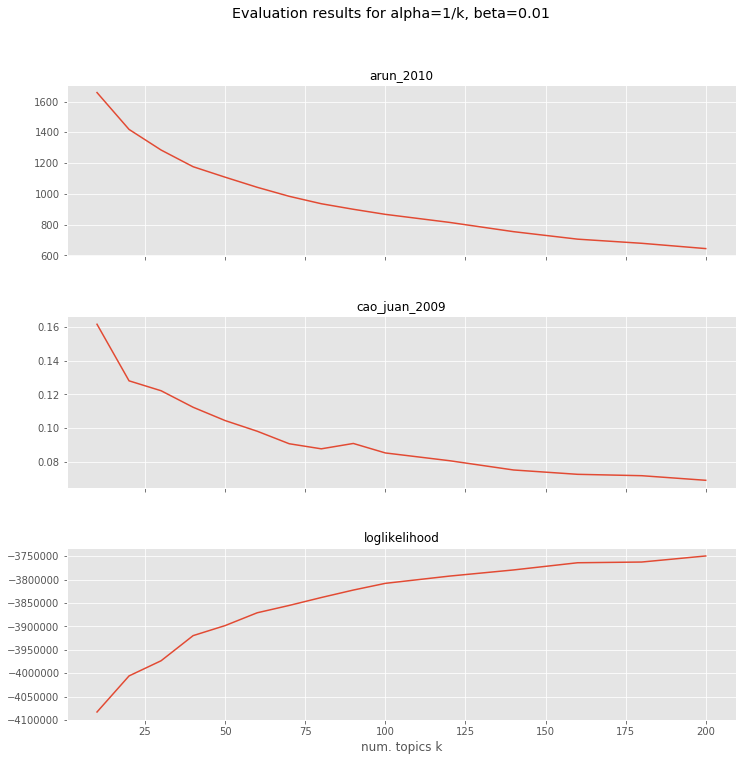

In [32]:
print('plotting evaluation results')
results_by_n_topics = results_by_parameter(eval_results, 'n_topics')
plot_eval_results(results_by_n_topics, xaxislabel='num. topics k',
                  title='Evaluation results for alpha=1/k, beta=0.01', figsize=(12, 12))
#plt.savefig('data/lda_evaluation_plot.png')
plt.show()



### alpha: 1/k beta: 0,1

In [33]:
const_params = dict(n_iter=2000, eta=0.1)
ks = list(range(10, 100, 10)) + list(range(100, 210, 20)) 
varying_params = [dict(n_topics=k, alpha=1.0/k) for k in ks]

eval_results2 = tm_lda.evaluate_topic_models(dtm,
    varying_params,
    const_params)

INFO:lda:n_documents: 113146
INFO:lda:n_documents: 113146
INFO:lda:n_documents: 113146
INFO:lda:n_documents: 113146
INFO:lda:n_documents: 113146
INFO:lda:n_documents: 113146
INFO:lda:n_documents: 113146
INFO:lda:n_documents: 113146
INFO:lda:n_documents: 113146
INFO:lda:vocab_size: 21112
INFO:lda:vocab_size: 21112
INFO:lda:n_documents: 113146
INFO:lda:vocab_size: 21112
INFO:lda:vocab_size: 21112
INFO:lda:vocab_size: 21112
INFO:lda:vocab_size: 21112
INFO:lda:n_words: 580410
INFO:lda:vocab_size: 21112
INFO:lda:vocab_size: 21112
INFO:lda:n_words: 580410
INFO:lda:n_words: 580410
INFO:lda:n_topics: 60
INFO:lda:n_documents: 113146
INFO:lda:vocab_size: 21112
INFO:lda:n_words: 580410
INFO:lda:n_words: 580410
INFO:lda:vocab_size: 21112
INFO:lda:n_words: 580410
INFO:lda:n_topics: 140
INFO:lda:n_topics: 70
INFO:lda:vocab_size: 21112
INFO:lda:n_words: 580410
INFO:lda:n_words: 580410
INFO:lda:n_topics: 40
INFO:lda:n_words: 580410
INFO:lda:n_topics: 160
INFO:lda:n_iter: 2000
INFO:lda:n_documents: 113

INFO:lda:<60> log likelihood: -4168631
INFO:lda:<50> log likelihood: -4158109
INFO:lda:<10> log likelihood: -4987893
INFO:lda:<70> log likelihood: -4163156
INFO:lda:<10> log likelihood: -5063199
INFO:lda:<30> log likelihood: -4257759
INFO:lda:<20> log likelihood: -4506653
INFO:lda:<10> log likelihood: -5252432
INFO:lda:<10> log likelihood: -5302544
INFO:lda:<80> log likelihood: -4157899
INFO:lda:<60> log likelihood: -4145440
INFO:lda:<10> log likelihood: -5033682
INFO:lda:<20> log likelihood: -4644299
INFO:lda:<40> log likelihood: -4198422
INFO:lda:<20> log likelihood: -4551963
INFO:lda:<20> log likelihood: -4530245
INFO:lda:<10> log likelihood: -5338936
INFO:lda:<90> log likelihood: -4154714
INFO:lda:<70> log likelihood: -4137014
INFO:lda:<100> log likelihood: -4152302
INFO:lda:<20> log likelihood: -4760889
INFO:lda:<50> log likelihood: -4171789
INFO:lda:<80> log likelihood: -4130181
INFO:lda:<40> log likelihood: -4220403
INFO:lda:<110> log likelihood: -4150076
INFO:lda:<120> log like

INFO:lda:<360> log likelihood: -4103341
INFO:lda:<100> log likelihood: -4164531
INFO:lda:<570> log likelihood: -4134991
INFO:lda:<190> log likelihood: -4094470
INFO:lda:<580> log likelihood: -4134996
INFO:lda:<370> log likelihood: -4101864
INFO:lda:<100> log likelihood: -4176952
INFO:lda:<70> log likelihood: -4356947
INFO:lda:<260> log likelihood: -4108715
INFO:lda:<590> log likelihood: -4135528
INFO:lda:<140> log likelihood: -4117156
INFO:lda:<600> log likelihood: -4135438
INFO:lda:<380> log likelihood: -4101355
INFO:lda:<610> log likelihood: -4134978
INFO:lda:<50> log likelihood: -4485139
INFO:lda:<270> log likelihood: -4107809
INFO:lda:<620> log likelihood: -4133620
INFO:lda:<390> log likelihood: -4100081
INFO:lda:<50> log likelihood: -4531345
INFO:lda:<630> log likelihood: -4133763
INFO:lda:<140> log likelihood: -4117050
INFO:lda:<80> log likelihood: -4207859
INFO:lda:<110> log likelihood: -4155478
INFO:lda:<280> log likelihood: -4108163
INFO:lda:<150> log likelihood: -4113989
INFO

INFO:lda:<670> log likelihood: -4096844
INFO:lda:<120> log likelihood: -4242230
INFO:lda:<350> log likelihood: -4082993
INFO:lda:<480> log likelihood: -4090876
INFO:lda:<260> log likelihood: -4098095
INFO:lda:<680> log likelihood: -4097812
INFO:lda:<1100> log likelihood: -4132785
INFO:lda:<150> log likelihood: -4141608
INFO:lda:<1110> log likelihood: -4132070
INFO:lda:<290> log likelihood: -4101884
INFO:lda:<690> log likelihood: -4097632
INFO:lda:<240> log likelihood: -4099483
INFO:lda:<1120> log likelihood: -4131455
INFO:lda:<490> log likelihood: -4090200
INFO:lda:<360> log likelihood: -4083945
INFO:lda:<1130> log likelihood: -4131029
INFO:lda:<200> log likelihood: -4116171
INFO:lda:<160> log likelihood: -4155491
INFO:lda:<130> log likelihood: -4215738
INFO:lda:<700> log likelihood: -4097664
INFO:lda:<1140> log likelihood: -4132307
INFO:lda:<500> log likelihood: -4089918
INFO:lda:<190> log likelihood: -4129410
INFO:lda:<1150> log likelihood: -4132801
INFO:lda:<270> log likelihood: -40

INFO:lda:<700> log likelihood: -4085825
INFO:lda:<530> log likelihood: -4079171
INFO:lda:<970> log likelihood: -4095350
INFO:lda:<1580> log likelihood: -4129783
INFO:lda:<340> log likelihood: -4091050
INFO:lda:<190> log likelihood: -4175028
INFO:lda:<1590> log likelihood: -4130930
INFO:lda:<420> log likelihood: -4091645
INFO:lda:<980> log likelihood: -4094173
INFO:lda:<710> log likelihood: -4088101
INFO:lda:<1600> log likelihood: -4129768
INFO:lda:<280> log likelihood: -4105815
INFO:lda:<540> log likelihood: -4078399
INFO:lda:<170> log likelihood: -4199771
INFO:lda:<1610> log likelihood: -4129838
INFO:lda:<990> log likelihood: -4094178
INFO:lda:<380> log likelihood: -4087531
INFO:lda:<1620> log likelihood: -4130557
INFO:lda:<280> log likelihood: -4116441
INFO:lda:<720> log likelihood: -4085312
INFO:lda:<140> log likelihood: -4258729
INFO:lda:<1000> log likelihood: -4094149
INFO:lda:<1630> log likelihood: -4131053
INFO:lda:<350> log likelihood: -4090997
INFO:lda:<430> log likelihood: -4

INFO:lda:<180> log likelihood: -4244656
INFO:lda:<300> log likelihood: -4115313
INFO:lda:<930> log likelihood: -4085553
INFO:lda:<440> log likelihood: -4088304
INFO:lda:<720> log likelihood: -4076889
INFO:lda:<940> log likelihood: -4083842
INFO:lda:<290> log likelihood: -4130113
INFO:lda:<370> log likelihood: -4100336
INFO:lda:<360> log likelihood: -4111536
INFO:lda:<730> log likelihood: -4077881
INFO:lda:<450> log likelihood: -4087386
INFO:lda:<490> log likelihood: -4084767
INFO:lda:<1290> log likelihood: -4091666
INFO:lda:<950> log likelihood: -4082896
INFO:lda:<250> log likelihood: -4155191
INFO:lda:<310> log likelihood: -4113091
INFO:lda:<1300> log likelihood: -4091037
INFO:lda:<230> log likelihood: -4175078
INFO:lda:<380> log likelihood: -4099826
INFO:lda:<300> log likelihood: -4130139
INFO:lda:<370> log likelihood: -4109947
INFO:lda:<320> log likelihood: -4112287
INFO:lda:<310> log likelihood: -4128751
INFO:lda:<740> log likelihood: -4076255
INFO:lda:<330> log likelihood: -411413

INFO:lda:<240> log likelihood: -4201474
INFO:lda:<1720> log likelihood: -4090928
INFO:lda:<410> log likelihood: -4109080
INFO:lda:<580> log likelihood: -4084940
INFO:lda:<240> log likelihood: -4216402
INFO:lda:<1730> log likelihood: -4089960
INFO:lda:<1250> log likelihood: -4080913
INFO:lda:<640> log likelihood: -4081933
INFO:lda:<940> log likelihood: -4076916
INFO:lda:<1740> log likelihood: -4090887
INFO:lda:<510> log likelihood: -4093645
INFO:lda:<770> log likelihood: -4086585
INFO:lda:<390> log likelihood: -4123129
INFO:lda:<1260> log likelihood: -4079241
INFO:lda:<1750> log likelihood: -4090835
INFO:lda:<1760> log likelihood: -4089980
INFO:lda:<490> log likelihood: -4107439
INFO:lda:<1270> log likelihood: -4080418
INFO:lda:<950> log likelihood: -4077071
INFO:lda:<590> log likelihood: -4085487
INFO:lda:<1770> log likelihood: -4090533
INFO:lda:<650> log likelihood: -4081655
INFO:lda:<780> log likelihood: -4086104
INFO:lda:<350> log likelihood: -4140402
INFO:lda:<1780> log likelihood:

INFO:lda:<1560> log likelihood: -4077861
INFO:lda:<1170> log likelihood: -4073265
INFO:lda:<720> log likelihood: -4080595
INFO:lda:<630> log likelihood: -4092941
INFO:lda:<1570> log likelihood: -4078228
INFO:lda:<590> log likelihood: -4106011
INFO:lda:<960> log likelihood: -4082715
INFO:lda:<510> log likelihood: -4104932
INFO:lda:<810> log likelihood: -4078397
INFO:lda:<1180> log likelihood: -4071993
INFO:lda:<470> log likelihood: -4118810
INFO:lda:<1580> log likelihood: -4076796
INFO:lda:<1590> log likelihood: -4077346
INFO:lda:<1190> log likelihood: -4072998
INFO:lda:<730> log likelihood: -4081024
INFO:lda:<970> log likelihood: -4083294
INFO:lda:<420> log likelihood: -4139080
INFO:lda:<370> log likelihood: -4154739
INFO:lda:<640> log likelihood: -4092956
INFO:lda:<820> log likelihood: -4078289
INFO:lda:<1600> log likelihood: -4077462
INFO:lda:<600> log likelihood: -4104597
INFO:lda:<1200> log likelihood: -4072437
INFO:lda:<310> log likelihood: -4188186
INFO:lda:<980> log likelihood: 

INFO:lda:<380> log likelihood: -4185295
INFO:lda:<1000> log likelihood: -4076885
INFO:lda:<1940> log likelihood: -4076885
INFO:lda:<1440> log likelihood: -4070350
INFO:lda:<1180> log likelihood: -4081157
INFO:lda:<770> log likelihood: -4090198
INFO:lda:<560> log likelihood: -4114951
INFO:lda:<900> log likelihood: -4079971
INFO:lda:<1950> log likelihood: -4075688
INFO:lda:<1450> log likelihood: -4070214
INFO:lda:<1190> log likelihood: -4081698
INFO:lda:<500> log likelihood: -4137526
INFO:lda:<1010> log likelihood: -4074914
INFO:lda:<1960> log likelihood: -4077096
INFO:lda:<630> log likelihood: -4101721
INFO:lda:<750> log likelihood: -4100559
INFO:lda:<1460> log likelihood: -4071646
INFO:lda:<1970> log likelihood: -4077306
INFO:lda:<780> log likelihood: -4091174
INFO:lda:<1200> log likelihood: -4081613
INFO:lda:<910> log likelihood: -4077340
INFO:lda:<450> log likelihood: -4151829
INFO:lda:<1980> log likelihood: -4076241
INFO:lda:<1020> log likelihood: -4074657
INFO:lda:<1470> log likeli

INFO:lda:<1450> log likelihood: -4078550
INFO:lda:<950> log likelihood: -4090201
INFO:lda:<1220> log likelihood: -4072179
INFO:lda:<460> log likelihood: -4175174
INFO:lda:<1770> log likelihood: -4070497
INFO:lda:<680> log likelihood: -4111714
INFO:lda:<1090> log likelihood: -4075671
INFO:lda:<1460> log likelihood: -4078454
INFO:lda:<590> log likelihood: -4134708
INFO:lda:<780> log likelihood: -4098578
INFO:lda:<1780> log likelihood: -4069694
INFO:lda:<1230> log likelihood: -4074311
INFO:lda:<890> log likelihood: -4098405
INFO:lda:<960> log likelihood: -4088122
INFO:lda:<470> log likelihood: -4178956
INFO:lda:<1470> log likelihood: -4079013
INFO:lda:<1790> log likelihood: -4071118
INFO:lda:<1100> log likelihood: -4077883
INFO:lda:<550> log likelihood: -4149153
INFO:lda:<1800> log likelihood: -4070474
INFO:lda:<1240> log likelihood: -4073873
INFO:lda:<1480> log likelihood: -4077827
INFO:lda:<690> log likelihood: -4110856
INFO:lda:<790> log likelihood: -4099861
INFO:lda:<970> log likeliho

INFO:lda:<1720> log likelihood: -4078843
INFO:lda:<1290> log likelihood: -4075179
INFO:lda:<710> log likelihood: -4130856
INFO:lda:<940> log likelihood: -4097310
INFO:lda:<1470> log likelihood: -4070930
INFO:lda:<1480> log likelihood: -4072585
INFO:lda:<950> log likelihood: -4097033
INFO:lda:<720> log likelihood: -4130206
INFO:lda:<1730> log likelihood: -4078466
INFO:lda:<560> log likelihood: -4166678
INFO:lda:<1300> log likelihood: -4075098
INFO:lda:<650> log likelihood: -4145159
INFO:lda:<960> log likelihood: -4095744
INFO:lda:<550> log likelihood: -4177685
INFO:lda:<810> log likelihood: -4109591
INFO:lda:<1490> log likelihood: -4070751
INFO:lda:<1050> log likelihood: -4097725
INFO:lda:<1310> log likelihood: -4076111
INFO:lda:<1740> log likelihood: -4079670
INFO:lda:<1500> log likelihood: -4070751
INFO:lda:<1140> log likelihood: -4086989
INFO:lda:<1060> log likelihood: -4098651
INFO:lda:<970> log likelihood: -4096102
INFO:lda:<820> log likelihood: -4107924
INFO:lda:<1750> log likelih

INFO:lda:<930> log likelihood: -4106411
INFO:lda:<1540> log likelihood: -4074769
INFO:lda:<1140> log likelihood: -4095313
INFO:lda:<670> log likelihood: -4163218
INFO:lda:<760> log likelihood: -4142932
INFO:lda:<1760> log likelihood: -4069309
INFO:lda:<1240> log likelihood: -4095538
INFO:lda:<1330> log likelihood: -4087132
INFO:lda:<1550> log likelihood: -4075072
INFO:lda:<1250> log likelihood: -4097632
INFO:lda:<1560> log likelihood: -4074333
INFO:lda:<650> log likelihood: -4170820
INFO:lda:<1340> log likelihood: -4087046
INFO:lda:<1770> log likelihood: -4070256
INFO:lda:<940> log likelihood: -4106710
INFO:lda:<1150> log likelihood: -4096241
INFO:lda:<770> log likelihood: -4140966
INFO:lda:<680> log likelihood: -4164277
INFO:lda:<1570> log likelihood: -4074053
INFO:lda:<1780> log likelihood: -4070183
INFO:lda:<1260> log likelihood: -4097714
INFO:lda:<1350> log likelihood: -4085482
INFO:lda:<1160> log likelihood: -4096791
INFO:lda:<1580> log likelihood: -4073002
INFO:lda:<860> log like

INFO:lda:<810> log likelihood: -4159192
INFO:lda:<1600> log likelihood: -4085564
INFO:lda:<1480> log likelihood: -4094825
INFO:lda:<990> log likelihood: -4125589
INFO:lda:<1830> log likelihood: -4072303
INFO:lda:<910> log likelihood: -4139763
INFO:lda:<1370> log likelihood: -4092267
INFO:lda:<1110> log likelihood: -4102603
INFO:lda:<1610> log likelihood: -4084107
INFO:lda:<1490> log likelihood: -4093780
INFO:lda:<1840> log likelihood: -4072746
INFO:lda:<760> log likelihood: -4167502
INFO:lda:<1620> log likelihood: -4085331
INFO:lda:<1380> log likelihood: -4092896
INFO:lda:<820> log likelihood: -4159267
INFO:lda:<1000> log likelihood: -4127409
INFO:lda:<1500> log likelihood: -4094386
INFO:lda:<1850> log likelihood: -4073281
INFO:lda:<1120> log likelihood: -4102987
INFO:lda:<920> log likelihood: -4137465
INFO:lda:<1630> log likelihood: -4085025
INFO:lda:<1860> log likelihood: -4072672
INFO:lda:<1390> log likelihood: -4093043
INFO:lda:<1510> log likelihood: -4093858
INFO:lda:<1640> log li

INFO:lda:<890> log likelihood: -4166076
INFO:lda:<1930> log likelihood: -4084557
INFO:lda:<1780> log likelihood: -4093175
INFO:lda:<1640> log likelihood: -4092439
INFO:lda:<1190> log likelihood: -4125001
INFO:lda:<1940> log likelihood: -4084233
INFO:lda:<1340> log likelihood: -4102145
INFO:lda:<970> log likelihood: -4152456
INFO:lda:<1100> log likelihood: -4136489
INFO:lda:<1790> log likelihood: -4091930
INFO:lda:<1650> log likelihood: -4091155
INFO:lda:<1950> log likelihood: -4083630
INFO:lda:<900> log likelihood: -4165366
INFO:lda:<1350> log likelihood: -4102010
INFO:lda:<1200> log likelihood: -4123980
INFO:lda:<1800> log likelihood: -4092303
INFO:lda:<1960> log likelihood: -4085794
INFO:lda:<1660> log likelihood: -4089905
INFO:lda:<1360> log likelihood: -4101779
INFO:lda:<1810> log likelihood: -4092428
INFO:lda:<1110> log likelihood: -4136614
INFO:lda:<1970> log likelihood: -4083004
INFO:lda:<1210> log likelihood: -4125193
INFO:lda:<1670> log likelihood: -4091029
INFO:lda:<910> log 

INFO:lda:<1320> log likelihood: -4135344
INFO:lda:<1999> log likelihood: -4090697
INFO:lda:<1090> log likelihood: -4162493
INFO:lda:<1670> log likelihood: -4099672
INFO:lda:<1460> log likelihood: -4121687
INFO:lda:<1680> log likelihood: -4099791
INFO:lda:<1330> log likelihood: -4136602
INFO:lda:<1190> log likelihood: -4152505
INFO:lda:<1100> log likelihood: -4161885
INFO:tmtoolkit:> evaluation result with metric "loglikelihood": -4089282.338315
INFO:tmtoolkit:> evaluation result with metric "cao_juan_2009": 0.079826
INFO:tmtoolkit:> evaluation result with metric "arun_2010": 980.238244
INFO:lda:<1690> log likelihood: -4099258
INFO:lda:<1470> log likelihood: -4121011
INFO:lda:<1340> log likelihood: -4136149
INFO:lda:<1200> log likelihood: -4151500
INFO:lda:<1700> log likelihood: -4099058
INFO:lda:<1480> log likelihood: -4121456
INFO:lda:<1110> log likelihood: -4164107
INFO:lda:<1350> log likelihood: -4135613
INFO:lda:<1710> log likelihood: -4099471
INFO:lda:<1490> log likelihood: -41218

INFO:lda:<1720> log likelihood: -4132100
INFO:lda:<1430> log likelihood: -4161159
INFO:lda:<1550> log likelihood: -4148366
INFO:lda:<1900> log likelihood: -4122465
INFO:lda:<1730> log likelihood: -4132897
INFO:lda:<1440> log likelihood: -4159525
INFO:lda:<1560> log likelihood: -4148943
INFO:lda:<1910> log likelihood: -4120400
INFO:lda:<1740> log likelihood: -4133894
INFO:lda:<1920> log likelihood: -4120101
INFO:lda:<1570> log likelihood: -4146855
INFO:lda:<1450> log likelihood: -4163630
INFO:lda:<1750> log likelihood: -4134822
INFO:lda:<1930> log likelihood: -4121587
INFO:lda:<1580> log likelihood: -4148138
INFO:lda:<1460> log likelihood: -4161158
INFO:lda:<1760> log likelihood: -4132975
INFO:lda:<1940> log likelihood: -4117836
INFO:lda:<1590> log likelihood: -4148414
INFO:lda:<1770> log likelihood: -4132782
INFO:lda:<1470> log likelihood: -4160240
INFO:lda:<1950> log likelihood: -4119553
INFO:lda:<1600> log likelihood: -4146636
INFO:lda:<1780> log likelihood: -4133964
INFO:lda:<1960> 

plotting evaluation results


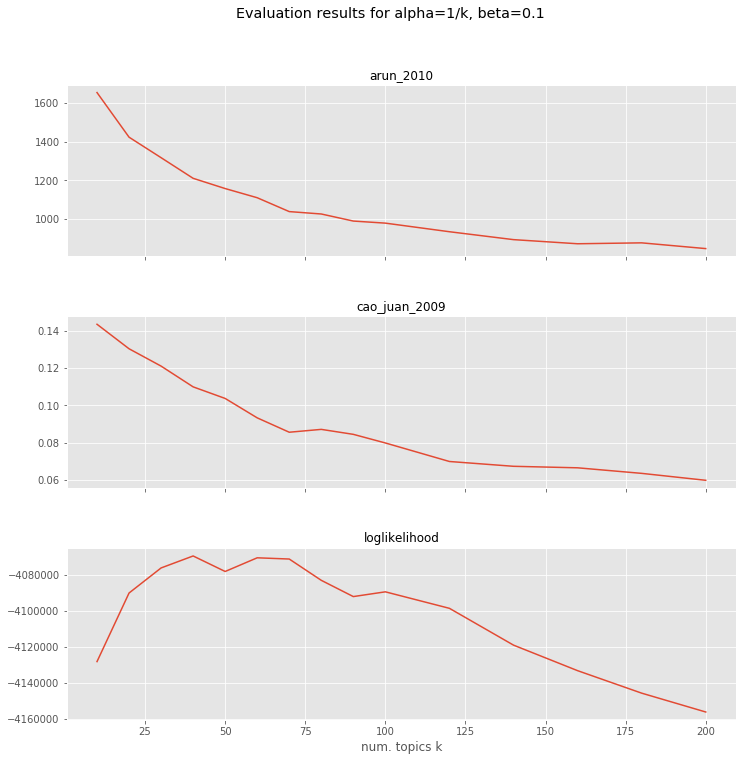

In [42]:
print('plotting evaluation results')
results_by_n_topics = results_by_parameter(eval_results2, 'n_topics')
plot_eval_results(results_by_n_topics, xaxislabel='num. topics k',
                  title='Evaluation results for alpha=1/k, beta=0.1', figsize=(12, 12))
#plt.savefig('data/lda_evaluation_plot.png')
plt.show()

In [44]:
caoTopics=caoScore=arunTopics=arunScore=999999
logScore=-99999999
for res in results_by_n_topics:
    if res[1]['cao_juan_2009'] < caoScore:
        caoScore = res[1]['cao_juan_2009']
        caoTopics = res[0]
    if res[1]['arun_2010'] < arunScore:
        arunScore = res[1]['arun_2010']
        arunTopics = res[0]
    if res[1]['loglikelihood'] > logScore:
        logScore = res[1]['loglikelihood']
        logTopics = res[0]       
print("cao : %s \t %s" % (caoScore, caoTopics))        
print("arun: %s \t %s" % (arunScore, arunTopics))
print("log: %s \t %s" % (logScore, logTopics))

cao : 0.059805392520493265 	 200
arun: 849.0092313592004 	 200
log: -4069297.0664423155 	 40


### alpha: 0.1 beta: 1/(10*k)

In [36]:
const_params = dict(n_iter=2000, alpha=0.1)
ks = list(range(10, 100, 10)) + list(range(100, 210, 20))
varying_params = [dict(n_topics=k, eta=1.0/(10*k)) for k in ks]

eval_results3 = tm_lda.evaluate_topic_models(dtm,
    varying_params,
    const_params)

INFO:lda:n_documents: 113146
INFO:lda:n_documents: 113146
INFO:lda:n_documents: 113146
INFO:lda:n_documents: 113146
INFO:lda:n_documents: 113146
INFO:lda:n_documents: 113146
INFO:lda:n_documents: 113146
INFO:lda:n_documents: 113146
INFO:lda:n_documents: 113146
INFO:lda:vocab_size: 21112
INFO:lda:vocab_size: 21112
INFO:lda:vocab_size: 21112
INFO:lda:vocab_size: 21112
INFO:lda:n_documents: 113146
INFO:lda:vocab_size: 21112
INFO:lda:vocab_size: 21112
INFO:lda:vocab_size: 21112
INFO:lda:n_words: 580410
INFO:lda:vocab_size: 21112
INFO:lda:n_words: 580410
INFO:lda:vocab_size: 21112
INFO:lda:n_words: 580410
INFO:lda:n_words: 580410
INFO:lda:n_words: 580410
INFO:lda:n_topics: 70
INFO:lda:n_words: 580410
INFO:lda:n_words: 580410
INFO:lda:n_words: 580410
INFO:lda:n_documents: 113146
INFO:lda:n_topics: 200
INFO:lda:n_topics: 90
INFO:lda:n_topics: 80
INFO:lda:n_words: 580410
INFO:lda:n_topics: 40
INFO:lda:n_topics: 140
INFO:lda:n_iter: 2000
INFO:lda:n_topics: 100
INFO:lda:n_topics: 120
INFO:lda:n_

INFO:lda:<0> log likelihood: -7798906
INFO:lda:<60> log likelihood: -4148416
INFO:lda:<50> log likelihood: -4185868
INFO:lda:<10> log likelihood: -4766374
INFO:lda:<70> log likelihood: -4140022
INFO:lda:<50> log likelihood: -4212176
INFO:lda:<20> log likelihood: -4320983
INFO:lda:<80> log likelihood: -4134697
INFO:lda:<10> log likelihood: -4814804
INFO:lda:<60> log likelihood: -4172976
INFO:lda:<20> log likelihood: -4366602
INFO:lda:<90> log likelihood: -4127458
INFO:lda:<10> log likelihood: -4870802
INFO:lda:<30> log likelihood: -4241118
INFO:lda:<100> log likelihood: -4123086
INFO:lda:<70> log likelihood: -4166274
INFO:lda:<60> log likelihood: -4195107
INFO:lda:<110> log likelihood: -4119479
INFO:lda:<20> log likelihood: -4414641
INFO:lda:<120> log likelihood: -4118160
INFO:lda:<20> log likelihood: -4379015
INFO:lda:<80> log likelihood: -4159743
INFO:lda:<40> log likelihood: -4210807
INFO:lda:<130> log likelihood: -4113947
INFO:lda:<10> log likelihood: -4918175
INFO:lda:<30> log like

INFO:lda:<220> log likelihood: -4138306
INFO:lda:<40> log likelihood: -4440271
INFO:lda:<660> log likelihood: -4090400
INFO:lda:<90> log likelihood: -4251483
INFO:lda:<40> log likelihood: -4436872
INFO:lda:<670> log likelihood: -4090807
INFO:lda:<150> log likelihood: -4181603
INFO:lda:<80> log likelihood: -4271558
INFO:lda:<110> log likelihood: -4219977
INFO:lda:<250> log likelihood: -4113969
INFO:lda:<390> log likelihood: -4104976
INFO:lda:<680> log likelihood: -4090208
INFO:lda:<50> log likelihood: -4373749
INFO:lda:<690> log likelihood: -4090277
INFO:lda:<60> log likelihood: -4329310
INFO:lda:<230> log likelihood: -4135122
INFO:lda:<70> log likelihood: -4298618
INFO:lda:<400> log likelihood: -4104448
INFO:lda:<700> log likelihood: -4090589
INFO:lda:<130> log likelihood: -4182463
INFO:lda:<260> log likelihood: -4112816
INFO:lda:<710> log likelihood: -4090728
INFO:lda:<160> log likelihood: -4178782
INFO:lda:<410> log likelihood: -4103001
INFO:lda:<720> log likelihood: -4090399
INFO:ld

INFO:lda:<130> log likelihood: -4263668
INFO:lda:<390> log likelihood: -4123011
INFO:lda:<1240> log likelihood: -4087033
INFO:lda:<700> log likelihood: -4097847
INFO:lda:<150> log likelihood: -4240300
INFO:lda:<170> log likelihood: -4221282
INFO:lda:<280> log likelihood: -4160387
INFO:lda:<80> log likelihood: -4377971
INFO:lda:<1250> log likelihood: -4086991
INFO:lda:<470> log likelihood: -4097995
INFO:lda:<1260> log likelihood: -4086867
INFO:lda:<710> log likelihood: -4098600
INFO:lda:<240> log likelihood: -4160853
INFO:lda:<400> log likelihood: -4122531
INFO:lda:<1270> log likelihood: -4085736
INFO:lda:<480> log likelihood: -4097035
INFO:lda:<720> log likelihood: -4097472
INFO:lda:<1280> log likelihood: -4086142
INFO:lda:<290> log likelihood: -4158321
INFO:lda:<210> log likelihood: -4187427
INFO:lda:<1290> log likelihood: -4086658
INFO:lda:<730> log likelihood: -4097229
INFO:lda:<1300> log likelihood: -4085972
INFO:lda:<490> log likelihood: -4097065
INFO:lda:<410> log likelihood: -41

INFO:lda:<250> log likelihood: -4205461
INFO:lda:<1020> log likelihood: -4093300
INFO:lda:<1810> log likelihood: -4084210
INFO:lda:<1820> log likelihood: -4084519
INFO:lda:<690> log likelihood: -4091262
INFO:lda:<560> log likelihood: -4118978
INFO:lda:<1030> log likelihood: -4093360
INFO:lda:<1830> log likelihood: -4083520
INFO:lda:<350> log likelihood: -4148176
INFO:lda:<1840> log likelihood: -4084619
INFO:lda:<120> log likelihood: -4347097
INFO:lda:<420> log likelihood: -4146574
INFO:lda:<300> log likelihood: -4179451
INFO:lda:<140> log likelihood: -4304865
INFO:lda:<1040> log likelihood: -4095193
INFO:lda:<110> log likelihood: -4361610
INFO:lda:<700> log likelihood: -4092038
INFO:lda:<1850> log likelihood: -4085040
INFO:lda:<200> log likelihood: -4243967
INFO:lda:<570> log likelihood: -4115003
INFO:lda:<1860> log likelihood: -4083955
INFO:lda:<1050> log likelihood: -4094283
INFO:lda:<1870> log likelihood: -4084271
INFO:lda:<260> log likelihood: -4203869
INFO:lda:<230> log likelihood

INFO:lda:<270> log likelihood: -4227818
INFO:lda:<1450> log likelihood: -4088670
INFO:lda:<950> log likelihood: -4085792
INFO:lda:<190> log likelihood: -4286727
INFO:lda:<410> log likelihood: -4170522
INFO:lda:<760> log likelihood: -4110835
INFO:lda:<1460> log likelihood: -4089378
INFO:lda:<480> log likelihood: -4140156
INFO:lda:<310> log likelihood: -4208399
INFO:lda:<150> log likelihood: -4343691
INFO:lda:<960> log likelihood: -4085602
INFO:lda:<1470> log likelihood: -4089915
INFO:lda:<130> log likelihood: -4397278
INFO:lda:<580> log likelihood: -4137663
INFO:lda:<230> log likelihood: -4251901
INFO:lda:<770> log likelihood: -4110990
INFO:lda:<1480> log likelihood: -4090235
INFO:lda:<970> log likelihood: -4083017
INFO:lda:<360> log likelihood: -4191702
INFO:lda:<1490> log likelihood: -4089462
INFO:lda:<490> log likelihood: -4139674
INFO:lda:<420> log likelihood: -4169463
INFO:lda:<980> log likelihood: -4084277
INFO:lda:<780> log likelihood: -4110822
INFO:lda:<590> log likelihood: -413

INFO:lda:<360> log likelihood: -4216316
INFO:lda:<630> log likelihood: -4132074
INFO:lda:<1910> log likelihood: -4090310
INFO:lda:<1260> log likelihood: -4079423
INFO:lda:<540> log likelihood: -4163362
INFO:lda:<990> log likelihood: -4105626
INFO:lda:<170> log likelihood: -4381065
INFO:lda:<300> log likelihood: -4241395
INFO:lda:<410> log likelihood: -4195723
INFO:lda:<1920> log likelihood: -4089261
INFO:lda:<760> log likelihood: -4131611
INFO:lda:<1270> log likelihood: -4079950
INFO:lda:<1930> log likelihood: -4090660
INFO:lda:<1000> log likelihood: -4105667
INFO:lda:<470> log likelihood: -4182885
INFO:lda:<640> log likelihood: -4133692
INFO:lda:<1940> log likelihood: -4090002
INFO:lda:<1280> log likelihood: -4081499
INFO:lda:<220> log likelihood: -4312571
INFO:lda:<550> log likelihood: -4163881
INFO:lda:<770> log likelihood: -4130426
INFO:lda:<1950> log likelihood: -4090231
INFO:lda:<1010> log likelihood: -4104950
INFO:lda:<1290> log likelihood: -4079941
INFO:lda:<370> log likelihood

INFO:lda:<810> log likelihood: -4127634
INFO:lda:<1620> log likelihood: -4076752
INFO:lda:<250> log likelihood: -4318744
INFO:lda:<600> log likelihood: -4178055
INFO:lda:<1630> log likelihood: -4077003
INFO:lda:<280> log likelihood: -4301854
INFO:lda:<1270> log likelihood: -4102884
INFO:lda:<220> log likelihood: -4369677
INFO:lda:<980> log likelihood: -4125014
INFO:lda:<700> log likelihood: -4154595
INFO:lda:<530> log likelihood: -4186187
INFO:lda:<1640> log likelihood: -4077267
INFO:lda:<820> log likelihood: -4126983
INFO:lda:<470> log likelihood: -4205586
INFO:lda:<1280> log likelihood: -4103108
INFO:lda:<390> log likelihood: -4234152
INFO:lda:<1650> log likelihood: -4077240
INFO:lda:<990> log likelihood: -4126736
INFO:lda:<330> log likelihood: -4261927
INFO:lda:<610> log likelihood: -4179045
INFO:lda:<1290> log likelihood: -4102846
INFO:lda:<1660> log likelihood: -4076041
INFO:lda:<830> log likelihood: -4126129
INFO:lda:<710> log likelihood: -4155165
INFO:lda:<1000> log likelihood: 

INFO:lda:<270> log likelihood: -4355171
INFO:lda:<1550> log likelihood: -4101576
INFO:lda:<400> log likelihood: -4256789
INFO:lda:<650> log likelihood: -4181020
INFO:lda:<740> log likelihood: -4175203
INFO:lda:<860> log likelihood: -4151343
INFO:lda:<1560> log likelihood: -4101584
INFO:lda:<1210> log likelihood: -4119729
INFO:lda:<310> log likelihood: -4309799
INFO:lda:<1010> log likelihood: -4124574
INFO:lda:<580> log likelihood: -4198727
INFO:lda:<350> log likelihood: -4291057
INFO:lda:<480> log likelihood: -4228573
INFO:lda:<1570> log likelihood: -4101106
INFO:lda:<1220> log likelihood: -4122562
INFO:lda:<750> log likelihood: -4174685
INFO:lda:<870> log likelihood: -4150939
INFO:lda:<660> log likelihood: -4182346
INFO:lda:<1020> log likelihood: -4123550
INFO:lda:<1580> log likelihood: -4100081
INFO:lda:<1230> log likelihood: -4121451
INFO:lda:<410> log likelihood: -4253662
INFO:lda:<1590> log likelihood: -4100779
INFO:lda:<590> log likelihood: -4199122
INFO:lda:<1030> log likelihood

INFO:lda:<430> log likelihood: -4284247
INFO:lda:<590> log likelihood: -4224035
INFO:lda:<1920> log likelihood: -4098614
INFO:lda:<500> log likelihood: -4249642
INFO:lda:<1500> log likelihood: -4118109
INFO:lda:<920> log likelihood: -4169668
INFO:lda:<810> log likelihood: -4176874
INFO:lda:<720> log likelihood: -4193557
INFO:lda:<1250> log likelihood: -4121026
INFO:lda:<1070> log likelihood: -4150034
INFO:lda:<1930> log likelihood: -4099435
INFO:lda:<340> log likelihood: -4345384
INFO:lda:<1510> log likelihood: -4118539
INFO:lda:<1940> log likelihood: -4097969
INFO:lda:<1260> log likelihood: -4120542
INFO:lda:<930> log likelihood: -4169922
INFO:lda:<600> log likelihood: -4223020
INFO:lda:<1080> log likelihood: -4147398
INFO:lda:<820> log likelihood: -4177092
INFO:lda:<1520> log likelihood: -4118259
INFO:lda:<1950> log likelihood: -4097127
INFO:lda:<730> log likelihood: -4192498
INFO:lda:<390> log likelihood: -4303414
INFO:lda:<1270> log likelihood: -4119755
INFO:lda:<440> log likelihoo

INFO:lda:<610> log likelihood: -4241692
INFO:lda:<1120> log likelihood: -4167977
INFO:lda:<1520> log likelihood: -4117307
INFO:lda:<880> log likelihood: -4187295
INFO:lda:<1300> log likelihood: -4146573
INFO:lda:<470> log likelihood: -4298248
INFO:lda:<1830> log likelihood: -4115421
INFO:lda:<530> log likelihood: -4275134
INFO:lda:<990> log likelihood: -4172536
INFO:lda:<1530> log likelihood: -4119080
INFO:lda:<1840> log likelihood: -4114285
INFO:lda:<1130> log likelihood: -4170398
INFO:lda:<1310> log likelihood: -4146131
INFO:lda:<730> log likelihood: -4218237
INFO:lda:<890> log likelihood: -4186473
INFO:lda:<1850> log likelihood: -4115181
INFO:lda:<1000> log likelihood: -4172300
INFO:lda:<1540> log likelihood: -4117009
INFO:lda:<620> log likelihood: -4244073
INFO:lda:<420> log likelihood: -4336594
INFO:lda:<1320> log likelihood: -4145713
INFO:lda:<1140> log likelihood: -4169205
INFO:lda:<1860> log likelihood: -4113837
INFO:lda:<1550> log likelihood: -4116849
INFO:lda:<540> log likeli

INFO:lda:<1190> log likelihood: -4170886
INFO:lda:<640> log likelihood: -4269241
INFO:lda:<1830> log likelihood: -4116770
INFO:lda:<570> log likelihood: -4292334
INFO:lda:<1570> log likelihood: -4143384
INFO:lda:<740> log likelihood: -4237539
INFO:lda:<1840> log likelihood: -4115551
INFO:lda:<1360> log likelihood: -4169166
INFO:lda:<880> log likelihood: -4216414
INFO:lda:<1200> log likelihood: -4170356
INFO:lda:<1070> log likelihood: -4182115
INFO:lda:<1580> log likelihood: -4143465
INFO:lda:<1850> log likelihood: -4117048
INFO:lda:<1370> log likelihood: -4169735
INFO:lda:<650> log likelihood: -4267244
INFO:lda:<1210> log likelihood: -4168875
INFO:lda:<1590> log likelihood: -4142885
INFO:lda:<1860> log likelihood: -4115707
INFO:lda:<750> log likelihood: -4237297
INFO:lda:<1080> log likelihood: -4182534
INFO:lda:<890> log likelihood: -4216935
INFO:lda:<510> log likelihood: -4329084
INFO:lda:<580> log likelihood: -4292439
INFO:lda:<1380> log likelihood: -4168846
INFO:lda:<1870> log likel

INFO:lda:<1060> log likelihood: -4214201
INFO:lda:<610> log likelihood: -4323007
INFO:lda:<690> log likelihood: -4288257
INFO:lda:<1890> log likelihood: -4142155
INFO:lda:<1290> log likelihood: -4178310
INFO:lda:<780> log likelihood: -4262695
INFO:lda:<1640> log likelihood: -4165829
INFO:lda:<1450> log likelihood: -4164113
INFO:lda:<900> log likelihood: -4231969
INFO:lda:<1900> log likelihood: -4141061
INFO:lda:<1070> log likelihood: -4213082
INFO:lda:<1650> log likelihood: -4166565
INFO:lda:<1300> log likelihood: -4178995
INFO:lda:<1910> log likelihood: -4141635
INFO:lda:<1460> log likelihood: -4164014
INFO:lda:<700> log likelihood: -4286454
INFO:lda:<790> log likelihood: -4263067
INFO:lda:<1660> log likelihood: -4164000
INFO:lda:<620> log likelihood: -4323961
INFO:lda:<910> log likelihood: -4231875
INFO:lda:<1920> log likelihood: -4141148
INFO:lda:<1310> log likelihood: -4177641
INFO:lda:<1080> log likelihood: -4214361
INFO:lda:<1470> log likelihood: -4164456
INFO:lda:<1670> log like

INFO:lda:<1290> log likelihood: -4212889
INFO:lda:<950> log likelihood: -4261053
INFO:lda:<1570> log likelihood: -4176672
INFO:lda:<1990> log likelihood: -4164326
INFO:lda:<1760> log likelihood: -4162671
INFO:lda:<750> log likelihood: -4317970
INFO:lda:<1300> log likelihood: -4212415
INFO:lda:<1100> log likelihood: -4225558
INFO:lda:<1999> log likelihood: -4164606
INFO:tmtoolkit:> evaluation result with metric "loglikelihood": -4164326.165417
INFO:tmtoolkit:> evaluation result with metric "cao_juan_2009": 0.046323
INFO:tmtoolkit:> evaluation result with metric "arun_2010": 839.514077
INFO:lda:<1580> log likelihood: -4176893
INFO:lda:<850> log likelihood: -4282676
INFO:lda:<960> log likelihood: -4259284
INFO:lda:<1770> log likelihood: -4162891
INFO:lda:<1310> log likelihood: -4213607
INFO:lda:<1590> log likelihood: -4177967
INFO:lda:<1780> log likelihood: -4161603
INFO:lda:<1110> log likelihood: -4226228
INFO:lda:<760> log likelihood: -4316505
INFO:lda:<970> log likelihood: -4260782
INF

INFO:lda:<1950> log likelihood: -4173841
INFO:lda:<940> log likelihood: -4313519
INFO:lda:<1370> log likelihood: -4223968
INFO:lda:<1060> log likelihood: -4278031
INFO:lda:<1960> log likelihood: -4175352
INFO:lda:<1620> log likelihood: -4207142
INFO:lda:<1200> log likelihood: -4255854
INFO:lda:<1970> log likelihood: -4176269
INFO:lda:<1380> log likelihood: -4226170
INFO:lda:<1630> log likelihood: -4206997
INFO:lda:<950> log likelihood: -4313711
INFO:lda:<1070> log likelihood: -4278596
INFO:lda:<1980> log likelihood: -4176587
INFO:lda:<1210> log likelihood: -4254430
INFO:lda:<1640> log likelihood: -4208417
INFO:lda:<1390> log likelihood: -4225518
INFO:lda:<1990> log likelihood: -4175302
INFO:lda:<960> log likelihood: -4312372
INFO:lda:<1080> log likelihood: -4278428
INFO:lda:<1650> log likelihood: -4207076
INFO:lda:<1220> log likelihood: -4254483
INFO:lda:<1400> log likelihood: -4224180
INFO:lda:<1999> log likelihood: -4175660
INFO:tmtoolkit:> evaluation result with metric "loglikelihoo

INFO:lda:<1570> log likelihood: -4253622
INFO:lda:<1800> log likelihood: -4222364
INFO:lda:<1400> log likelihood: -4272018
INFO:lda:<1250> log likelihood: -4309252
INFO:lda:<1580> log likelihood: -4252397
INFO:lda:<1810> log likelihood: -4220309
INFO:lda:<1410> log likelihood: -4274431
INFO:lda:<1820> log likelihood: -4221125
INFO:lda:<1590> log likelihood: -4254103
INFO:lda:<1260> log likelihood: -4309175
INFO:lda:<1830> log likelihood: -4221284
INFO:lda:<1420> log likelihood: -4273989
INFO:lda:<1600> log likelihood: -4252891
INFO:lda:<1270> log likelihood: -4309004
INFO:lda:<1840> log likelihood: -4220474
INFO:lda:<1610> log likelihood: -4251725
INFO:lda:<1430> log likelihood: -4273671
INFO:lda:<1850> log likelihood: -4221326
INFO:lda:<1280> log likelihood: -4309477
INFO:lda:<1620> log likelihood: -4252666
INFO:lda:<1440> log likelihood: -4272028
INFO:lda:<1860> log likelihood: -4220768
INFO:lda:<1290> log likelihood: -4310260
INFO:lda:<1630> log likelihood: -4252104
INFO:lda:<1450> 

INFO:lda:<1830> log likelihood: -4303996
INFO:lda:<1840> log likelihood: -4303882
INFO:lda:<1850> log likelihood: -4304268
INFO:lda:<1860> log likelihood: -4304000
INFO:lda:<1870> log likelihood: -4302654
INFO:lda:<1880> log likelihood: -4304698
INFO:lda:<1890> log likelihood: -4304467
INFO:lda:<1900> log likelihood: -4303374
INFO:lda:<1910> log likelihood: -4303594
INFO:lda:<1920> log likelihood: -4303086
INFO:lda:<1930> log likelihood: -4303272
INFO:lda:<1940> log likelihood: -4303697
INFO:lda:<1950> log likelihood: -4303386
INFO:lda:<1960> log likelihood: -4303137
INFO:lda:<1970> log likelihood: -4303190
INFO:lda:<1980> log likelihood: -4301413
INFO:lda:<1990> log likelihood: -4302058
INFO:lda:<1999> log likelihood: -4302199
INFO:tmtoolkit:> evaluation result with metric "loglikelihood": -4302058.115427
INFO:tmtoolkit:> evaluation result with metric "cao_juan_2009": 0.026903
INFO:tmtoolkit:> evaluation result with metric "arun_2010": 478.869141


plotting evaluation results


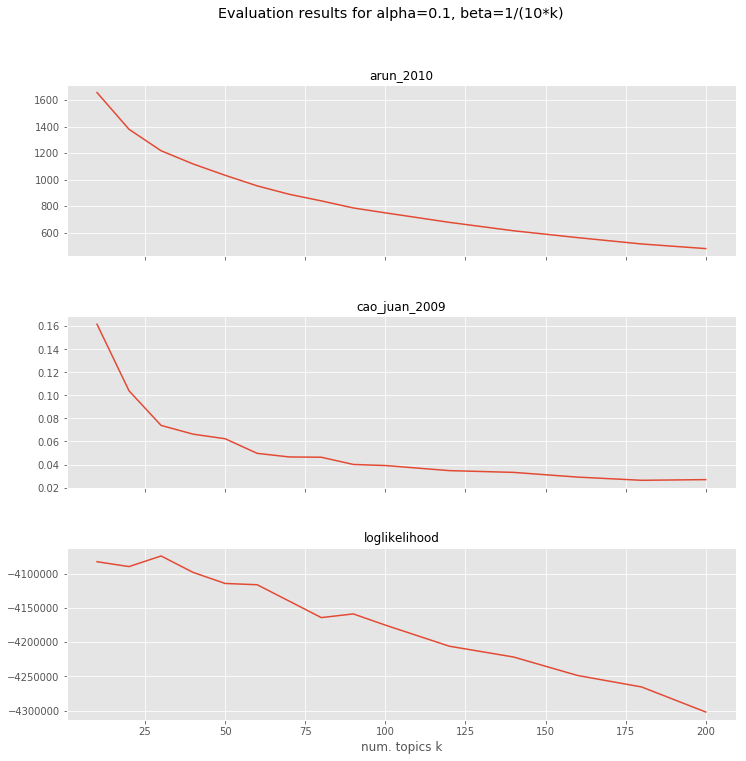

In [45]:
print('plotting evaluation results')
results_by_n_topics = results_by_parameter(eval_results3, 'n_topics')
plot_eval_results(results_by_n_topics, xaxislabel='num. topics k',
                  title='Evaluation results for alpha=0.1, beta=1/(10*k)', figsize=(12, 12))
#plt.savefig('data/lda_evaluation_plot.png')
plt.show()

In [46]:
caoTopics=caoScore=arunTopics=arunScore=999999
logScore=-99999999
for res in results_by_n_topics:
    if res[1]['cao_juan_2009'] < caoScore:
        caoScore = res[1]['cao_juan_2009']
        caoTopics = res[0]
    if res[1]['arun_2010'] < arunScore:
        arunScore = res[1]['arun_2010']
        arunTopics = res[0]
    if res[1]['loglikelihood'] > logScore:
        logScore = res[1]['loglikelihood']
        logTopics = res[0]       
print("cao : %s \t %s" % (caoScore, caoTopics))        
print("arun: %s \t %s" % (arunScore, arunTopics))
print("log: %s \t %s" % (logScore, logTopics))

cao : 0.02631735063435343 	 180
arun: 478.86914062582485 	 200
log: -4074419.6334342947 	 30


### alpha: 0.1 beta: 0.001

In [38]:
const_params = dict(n_iter=2000, alpha=0.1, eta=0.001)
ks = list(range(10, 100, 10)) + list(range(100, 210, 20))
varying_params = [dict(n_topics=k) for k in ks]

eval_results4 = tm_lda.evaluate_topic_models(dtm,
    varying_params,
    const_params)

INFO:lda:n_documents: 113146
INFO:lda:n_documents: 113146
INFO:lda:n_documents: 113146
INFO:lda:vocab_size: 21112
INFO:lda:n_documents: 113146
INFO:lda:n_documents: 113146
INFO:lda:n_documents: 113146
INFO:lda:n_words: 580410
INFO:lda:n_documents: 113146
INFO:lda:n_documents: 113146
INFO:lda:n_documents: 113146
INFO:lda:vocab_size: 21112
INFO:lda:vocab_size: 21112
INFO:lda:vocab_size: 21112
INFO:lda:vocab_size: 21112
INFO:lda:vocab_size: 21112
INFO:lda:n_documents: 113146
INFO:lda:vocab_size: 21112
INFO:lda:n_topics: 20
INFO:lda:n_words: 580410
INFO:lda:n_words: 580410
INFO:lda:vocab_size: 21112
INFO:lda:vocab_size: 21112
INFO:lda:n_words: 580410
INFO:lda:n_words: 580410
INFO:lda:n_words: 580410
INFO:lda:n_iter: 2000
INFO:lda:vocab_size: 21112
INFO:lda:n_words: 580410
INFO:lda:n_topics: 60
INFO:lda:n_words: 580410
INFO:lda:n_topics: 100
INFO:lda:n_topics: 40
INFO:lda:n_words: 580410
INFO:lda:n_words: 580410
INFO:lda:n_topics: 10
INFO:lda:n_topics: 80
INFO:lda:n_documents: 113146
INFO:l

INFO:lda:<30> log likelihood: -4285662
INFO:lda:<70> log likelihood: -4227913
INFO:lda:<40> log likelihood: -4270333
INFO:lda:<10> log likelihood: -4830293
INFO:lda:<80> log likelihood: -4223857
INFO:lda:<20> log likelihood: -4370429
INFO:lda:<20> log likelihood: -4398763
INFO:lda:<50> log likelihood: -4252177
INFO:lda:<40> log likelihood: -4255233
INFO:lda:<90> log likelihood: -4219207
INFO:lda:<10> log likelihood: -4886813
INFO:lda:<10> log likelihood: -4859630
INFO:lda:<100> log likelihood: -4214870
INFO:lda:<60> log likelihood: -4241926
INFO:lda:<20> log likelihood: -4402759
INFO:lda:<110> log likelihood: -4212537
INFO:lda:<10> log likelihood: -4945181
INFO:lda:<30> log likelihood: -4297398
INFO:lda:<50> log likelihood: -4236907
INFO:lda:<120> log likelihood: -4210324
INFO:lda:<20> log likelihood: -4424926
INFO:lda:<70> log likelihood: -4230999
INFO:lda:<10> log likelihood: -4983483
INFO:lda:<30> log likelihood: -4322502
INFO:lda:<130> log likelihood: -4204357
INFO:lda:<80> log lik

INFO:lda:<90> log likelihood: -4255264
INFO:lda:<650> log likelihood: -4160621
INFO:lda:<370> log likelihood: -4152940
INFO:lda:<190> log likelihood: -4175521
INFO:lda:<60> log likelihood: -4326573
INFO:lda:<660> log likelihood: -4160439
INFO:lda:<260> log likelihood: -4159526
INFO:lda:<380> log likelihood: -4150829
INFO:lda:<110> log likelihood: -4241100
INFO:lda:<670> log likelihood: -4159041
INFO:lda:<130> log likelihood: -4219102
INFO:lda:<680> log likelihood: -4158617
INFO:lda:<390> log likelihood: -4148279
INFO:lda:<270> log likelihood: -4157546
INFO:lda:<40> log likelihood: -4441423
INFO:lda:<160> log likelihood: -4203926
INFO:lda:<200> log likelihood: -4173251
INFO:lda:<690> log likelihood: -4157746
INFO:lda:<400> log likelihood: -4148541
INFO:lda:<700> log likelihood: -4158322
INFO:lda:<80> log likelihood: -4291019
INFO:lda:<280> log likelihood: -4157641
INFO:lda:<710> log likelihood: -4158446
INFO:lda:<90> log likelihood: -4262261
INFO:lda:<100> log likelihood: -4249923
INFO:

INFO:lda:<1220> log likelihood: -4145642
INFO:lda:<480> log likelihood: -4133505
INFO:lda:<200> log likelihood: -4209352
INFO:lda:<1230> log likelihood: -4146216
INFO:lda:<700> log likelihood: -4127583
INFO:lda:<1240> log likelihood: -4145903
INFO:lda:<360> log likelihood: -4151645
INFO:lda:<240> log likelihood: -4189029
INFO:lda:<290> log likelihood: -4180542
INFO:lda:<490> log likelihood: -4132558
INFO:lda:<140> log likelihood: -4260211
INFO:lda:<1250> log likelihood: -4146355
INFO:lda:<710> log likelihood: -4127004
INFO:lda:<1260> log likelihood: -4145497
INFO:lda:<1270> log likelihood: -4146065
INFO:lda:<720> log likelihood: -4126513
INFO:lda:<500> log likelihood: -4132694
INFO:lda:<370> log likelihood: -4151309
INFO:lda:<160> log likelihood: -4229680
INFO:lda:<1280> log likelihood: -4145149
INFO:lda:<180> log likelihood: -4220740
INFO:lda:<100> log likelihood: -4311342
INFO:lda:<300> log likelihood: -4177641
INFO:lda:<1290> log likelihood: -4146514
INFO:lda:<730> log likelihood: -

INFO:lda:<1810> log likelihood: -4138518
INFO:lda:<1020> log likelihood: -4116768
INFO:lda:<700> log likelihood: -4122070
INFO:lda:<1820> log likelihood: -4137881
INFO:lda:<120> log likelihood: -4320319
INFO:lda:<140> log likelihood: -4292589
INFO:lda:<350> log likelihood: -4176933
INFO:lda:<1830> log likelihood: -4137664
INFO:lda:<420> log likelihood: -4161832
INFO:lda:<1030> log likelihood: -4115541
INFO:lda:<530> log likelihood: -4139342
INFO:lda:<710> log likelihood: -4121307
INFO:lda:<1840> log likelihood: -4138156
INFO:lda:<300> log likelihood: -4191638
INFO:lda:<1040> log likelihood: -4116194
INFO:lda:<1850> log likelihood: -4138457
INFO:lda:<230> log likelihood: -4214915
INFO:lda:<1860> log likelihood: -4138843
INFO:lda:<720> log likelihood: -4120957
INFO:lda:<1050> log likelihood: -4115622
INFO:lda:<1870> log likelihood: -4138480
INFO:lda:<260> log likelihood: -4206248
INFO:lda:<540> log likelihood: -4140612
INFO:lda:<430> log likelihood: -4162396
INFO:lda:<170> log likelihood

INFO:lda:<350> log likelihood: -4191801
INFO:lda:<480> log likelihood: -4158178
INFO:lda:<970> log likelihood: -4112585
INFO:lda:<580> log likelihood: -4154168
INFO:lda:<280> log likelihood: -4226415
INFO:lda:<1430> log likelihood: -4107639
INFO:lda:<730> log likelihood: -4131352
INFO:lda:<410> log likelihood: -4183412
INFO:lda:<1440> log likelihood: -4105897
INFO:lda:<980> log likelihood: -4111743
INFO:lda:<230> log likelihood: -4247185
INFO:lda:<1450> log likelihood: -4105501
INFO:lda:<740> log likelihood: -4129318
INFO:lda:<590> log likelihood: -4152708
INFO:lda:<490> log likelihood: -4158089
INFO:lda:<990> log likelihood: -4111208
INFO:lda:<1460> log likelihood: -4107479
INFO:lda:<320> log likelihood: -4204948
INFO:lda:<170> log likelihood: -4305647
INFO:lda:<360> log likelihood: -4192207
INFO:lda:<150> log likelihood: -4338396
INFO:lda:<1470> log likelihood: -4107871
INFO:lda:<750> log likelihood: -4130782
INFO:lda:<420> log likelihood: -4183907
INFO:lda:<1000> log likelihood: -41

INFO:lda:<1870> log likelihood: -4104234
INFO:lda:<410> log likelihood: -4194094
INFO:lda:<300> log likelihood: -4238273
INFO:lda:<1290> log likelihood: -4106527
INFO:lda:<630> log likelihood: -4152109
INFO:lda:<370> log likelihood: -4214187
INFO:lda:<1880> log likelihood: -4105134
INFO:lda:<960> log likelihood: -4125969
INFO:lda:<540> log likelihood: -4177456
INFO:lda:<1890> log likelihood: -4103856
INFO:lda:<1300> log likelihood: -4106861
INFO:lda:<220> log likelihood: -4295274
INFO:lda:<770> log likelihood: -4145453
INFO:lda:<1900> log likelihood: -4104264
INFO:lda:<970> log likelihood: -4123790
INFO:lda:<1310> log likelihood: -4106085
INFO:lda:<640> log likelihood: -4151053
INFO:lda:<470> log likelihood: -4183394
INFO:lda:<1910> log likelihood: -4105646
INFO:lda:<1320> log likelihood: -4106130
INFO:lda:<780> log likelihood: -4145111
INFO:lda:<420> log likelihood: -4194680
INFO:lda:<980> log likelihood: -4123035
INFO:lda:<1920> log likelihood: -4104523
INFO:lda:<550> log likelihood:

INFO:lda:<590> log likelihood: -4175276
INFO:lda:<1660> log likelihood: -4101658
INFO:lda:<280> log likelihood: -4286387
INFO:lda:<1230> log likelihood: -4117520
INFO:lda:<220> log likelihood: -4348153
INFO:lda:<690> log likelihood: -4169093
INFO:lda:<980> log likelihood: -4139964
INFO:lda:<810> log likelihood: -4143594
INFO:lda:<1670> log likelihood: -4101304
INFO:lda:<530> log likelihood: -4188216
INFO:lda:<1240> log likelihood: -4118025
INFO:lda:<1680> log likelihood: -4102152
INFO:lda:<390> log likelihood: -4229892
INFO:lda:<990> log likelihood: -4138997
INFO:lda:<600> log likelihood: -4174115
INFO:lda:<480> log likelihood: -4202815
INFO:lda:<700> log likelihood: -4168542
INFO:lda:<330> log likelihood: -4253972
INFO:lda:<820> log likelihood: -4143251
INFO:lda:<1250> log likelihood: -4116844
INFO:lda:<1690> log likelihood: -4101643
INFO:lda:<250> log likelihood: -4315318
INFO:lda:<1000> log likelihood: -4138312
INFO:lda:<1700> log likelihood: -4101678
INFO:lda:<1260> log likelihood:

INFO:lda:<1210> log likelihood: -4132832
INFO:lda:<1520> log likelihood: -4114131
INFO:lda:<1000> log likelihood: -4139519
INFO:lda:<480> log likelihood: -4223057
INFO:lda:<1530> log likelihood: -4114999
INFO:lda:<860> log likelihood: -4160801
INFO:lda:<1220> log likelihood: -4131703
INFO:lda:<740> log likelihood: -4167834
INFO:lda:<350> log likelihood: -4278217
INFO:lda:<590> log likelihood: -4199122
INFO:lda:<1010> log likelihood: -4140256
INFO:lda:<660> log likelihood: -4187131
INFO:lda:<1540> log likelihood: -4115163
INFO:lda:<1230> log likelihood: -4133161
INFO:lda:<310> log likelihood: -4306694
INFO:lda:<1550> log likelihood: -4114140
INFO:lda:<870> log likelihood: -4159864
INFO:lda:<410> log likelihood: -4245973
INFO:lda:<1020> log likelihood: -4140081
INFO:lda:<750> log likelihood: -4168337
INFO:lda:<1240> log likelihood: -4132122
INFO:lda:<490> log likelihood: -4224008
INFO:lda:<1560> log likelihood: -4114213
INFO:lda:<600> log likelihood: -4197214
INFO:lda:<280> log likelihoo

INFO:lda:<1060> log likelihood: -4154577
INFO:lda:<810> log likelihood: -4182395
INFO:lda:<500> log likelihood: -4241589
INFO:lda:<1890> log likelihood: -4109787
INFO:lda:<380> log likelihood: -4297295
INFO:lda:<1510> log likelihood: -4126419
INFO:lda:<730> log likelihood: -4192498
INFO:lda:<1250> log likelihood: -4137526
INFO:lda:<1900> log likelihood: -4109270
INFO:lda:<920> log likelihood: -4161368
INFO:lda:<600> log likelihood: -4215818
INFO:lda:<1070> log likelihood: -4152811
INFO:lda:<1520> log likelihood: -4127288
INFO:lda:<1910> log likelihood: -4109348
INFO:lda:<820> log likelihood: -4182732
INFO:lda:<1260> log likelihood: -4136703
INFO:lda:<1530> log likelihood: -4127016
INFO:lda:<440> log likelihood: -4274417
INFO:lda:<1920> log likelihood: -4108524
INFO:lda:<930> log likelihood: -4162892
INFO:lda:<740> log likelihood: -4192174
INFO:lda:<1080> log likelihood: -4153484
INFO:lda:<510> log likelihood: -4240662
INFO:lda:<1270> log likelihood: -4137722
INFO:lda:<1930> log likelih

INFO:lda:<1290> log likelihood: -4150852
INFO:lda:<1830> log likelihood: -4126645
INFO:lda:<610> log likelihood: -4236609
INFO:lda:<990> log likelihood: -4179754
INFO:lda:<530> log likelihood: -4269023
INFO:lda:<1520> log likelihood: -4135476
INFO:lda:<1840> log likelihood: -4126648
INFO:lda:<1120> log likelihood: -4155518
INFO:lda:<890> log likelihood: -4186473
INFO:lda:<730> log likelihood: -4212154
INFO:lda:<1300> log likelihood: -4150385
INFO:lda:<420> log likelihood: -4319189
INFO:lda:<1850> log likelihood: -4127536
INFO:lda:<1530> log likelihood: -4135834
INFO:lda:<1000> log likelihood: -4180491
INFO:lda:<470> log likelihood: -4291549
INFO:lda:<1130> log likelihood: -4155350
INFO:lda:<1310> log likelihood: -4150032
INFO:lda:<1860> log likelihood: -4124800
INFO:lda:<620> log likelihood: -4237954
INFO:lda:<1540> log likelihood: -4135535
INFO:lda:<900> log likelihood: -4186841
INFO:lda:<740> log likelihood: -4212398
INFO:lda:<1870> log likelihood: -4126244
INFO:lda:<1320> log likeli

INFO:lda:<1560> log likelihood: -4149169
INFO:lda:<1070> log likelihood: -4182115
INFO:lda:<1830> log likelihood: -4135594
INFO:lda:<1350> log likelihood: -4154713
INFO:lda:<740> log likelihood: -4233735
INFO:lda:<880> log likelihood: -4208893
INFO:lda:<1200> log likelihood: -4176929
INFO:lda:<1570> log likelihood: -4148002
INFO:lda:<1840> log likelihood: -4135118
INFO:lda:<1360> log likelihood: -4153642
INFO:lda:<1080> log likelihood: -4182534
INFO:lda:<510> log likelihood: -4315499
INFO:lda:<1850> log likelihood: -4134312
INFO:lda:<1580> log likelihood: -4147024
INFO:lda:<1210> log likelihood: -4174091
INFO:lda:<570> log likelihood: -4284800
INFO:lda:<650> log likelihood: -4263631
INFO:lda:<890> log likelihood: -4208265
INFO:lda:<750> log likelihood: -4233968
INFO:lda:<1370> log likelihood: -4152935
INFO:lda:<1860> log likelihood: -4134265
INFO:lda:<1590> log likelihood: -4148286
INFO:lda:<1090> log likelihood: -4182624
INFO:lda:<1220> log likelihood: -4176082
INFO:lda:<1870> log lik

INFO:lda:<1880> log likelihood: -4144536
INFO:lda:<1060> log likelihood: -4205821
INFO:lda:<1630> log likelihood: -4151205
INFO:lda:<780> log likelihood: -4257802
INFO:lda:<1890> log likelihood: -4144664
INFO:lda:<1450> log likelihood: -4176210
INFO:lda:<900> log likelihood: -4229336
INFO:lda:<1300> log likelihood: -4178995
INFO:lda:<1640> log likelihood: -4151429
INFO:lda:<1070> log likelihood: -4205711
INFO:lda:<1900> log likelihood: -4145151
INFO:lda:<690> log likelihood: -4281405
INFO:lda:<620> log likelihood: -4310113
INFO:lda:<1460> log likelihood: -4175092
INFO:lda:<1650> log likelihood: -4152187
INFO:lda:<1310> log likelihood: -4177641
INFO:lda:<1910> log likelihood: -4143904
INFO:lda:<790> log likelihood: -4256019
INFO:lda:<910> log likelihood: -4229312
INFO:lda:<1080> log likelihood: -4204519
INFO:lda:<1470> log likelihood: -4174411
INFO:lda:<1660> log likelihood: -4151837
INFO:lda:<1920> log likelihood: -4144062
INFO:lda:<1320> log likelihood: -4177839
INFO:lda:<700> log lik

INFO:lda:<750> log likelihood: -4307337
INFO:lda:<1980> log likelihood: -4149734
INFO:lda:<950> log likelihood: -4254595
INFO:lda:<1760> log likelihood: -4171564
INFO:lda:<1580> log likelihood: -4176893
INFO:lda:<1990> log likelihood: -4151916
INFO:lda:<840> log likelihood: -4279933
INFO:lda:<1300> log likelihood: -4203606
INFO:lda:<1100> log likelihood: -4226687
INFO:lda:<1770> log likelihood: -4170591
INFO:lda:<1999> log likelihood: -4150867
INFO:tmtoolkit:> evaluation result with metric "loglikelihood": -4151916.028494
INFO:tmtoolkit:> evaluation result with metric "cao_juan_2009": 0.043786
INFO:tmtoolkit:> evaluation result with metric "arun_2010": 828.592387
INFO:lda:<960> log likelihood: -4252706
INFO:lda:<1590> log likelihood: -4177967
INFO:lda:<760> log likelihood: -4307113
INFO:lda:<1310> log likelihood: -4203917
INFO:lda:<1780> log likelihood: -4170805
INFO:lda:<1110> log likelihood: -4226340
INFO:lda:<1600> log likelihood: -4175482
INFO:lda:<850> log likelihood: -4279981
INF

INFO:lda:<1190> log likelihood: -4251194
INFO:lda:<1050> log likelihood: -4278660
INFO:lda:<1960> log likelihood: -4175352
INFO:lda:<1370> log likelihood: -4224882
INFO:lda:<1620> log likelihood: -4200673
INFO:lda:<1970> log likelihood: -4176269
INFO:lda:<950> log likelihood: -4302827
INFO:lda:<1200> log likelihood: -4250685
INFO:lda:<1380> log likelihood: -4225252
INFO:lda:<1630> log likelihood: -4201225
INFO:lda:<1060> log likelihood: -4278311
INFO:lda:<1980> log likelihood: -4176587
INFO:lda:<1210> log likelihood: -4250021
INFO:lda:<1640> log likelihood: -4200378
INFO:lda:<1390> log likelihood: -4225023
INFO:lda:<1990> log likelihood: -4175302
INFO:lda:<960> log likelihood: -4300722
INFO:lda:<1070> log likelihood: -4277315
INFO:lda:<1999> log likelihood: -4175660
INFO:tmtoolkit:> evaluation result with metric "loglikelihood": -4175301.591676
INFO:tmtoolkit:> evaluation result with metric "cao_juan_2009": 0.039124
INFO:tmtoolkit:> evaluation result with metric "arun_2010": 749.024622

INFO:lda:<1800> log likelihood: -4222916
INFO:lda:<1390> log likelihood: -4274801
INFO:lda:<1250> log likelihood: -4301176
INFO:lda:<1810> log likelihood: -4223350
INFO:lda:<1580> log likelihood: -4249854
INFO:lda:<1400> log likelihood: -4275252
INFO:lda:<1260> log likelihood: -4301530
INFO:lda:<1820> log likelihood: -4222410
INFO:lda:<1590> log likelihood: -4250366
INFO:lda:<1410> log likelihood: -4274898
INFO:lda:<1830> log likelihood: -4224214
INFO:lda:<1270> log likelihood: -4300507
INFO:lda:<1600> log likelihood: -4249708
INFO:lda:<1840> log likelihood: -4222414
INFO:lda:<1420> log likelihood: -4275772
INFO:lda:<1610> log likelihood: -4249605
INFO:lda:<1280> log likelihood: -4303467
INFO:lda:<1850> log likelihood: -4222430
INFO:lda:<1430> log likelihood: -4276197
INFO:lda:<1620> log likelihood: -4249215
INFO:lda:<1860> log likelihood: -4222847
INFO:lda:<1290> log likelihood: -4301757
INFO:lda:<1440> log likelihood: -4273426
INFO:lda:<1630> log likelihood: -4249028
INFO:lda:<1870> 

INFO:lda:<1830> log likelihood: -4297208
INFO:lda:<1840> log likelihood: -4296860
INFO:lda:<1850> log likelihood: -4298497
INFO:lda:<1860> log likelihood: -4295418
INFO:lda:<1870> log likelihood: -4297091
INFO:lda:<1880> log likelihood: -4295772
INFO:lda:<1890> log likelihood: -4295862
INFO:lda:<1900> log likelihood: -4296147
INFO:lda:<1910> log likelihood: -4297072
INFO:lda:<1920> log likelihood: -4296182
INFO:lda:<1930> log likelihood: -4296992
INFO:lda:<1940> log likelihood: -4297322
INFO:lda:<1950> log likelihood: -4296943
INFO:lda:<1960> log likelihood: -4296044
INFO:lda:<1970> log likelihood: -4296564
INFO:lda:<1980> log likelihood: -4296303
INFO:lda:<1990> log likelihood: -4295656
INFO:lda:<1999> log likelihood: -4296492
INFO:tmtoolkit:> evaluation result with metric "loglikelihood": -4295655.741544
INFO:tmtoolkit:> evaluation result with metric "cao_juan_2009": 0.027101
INFO:tmtoolkit:> evaluation result with metric "arun_2010": 484.738962


plotting evaluation results


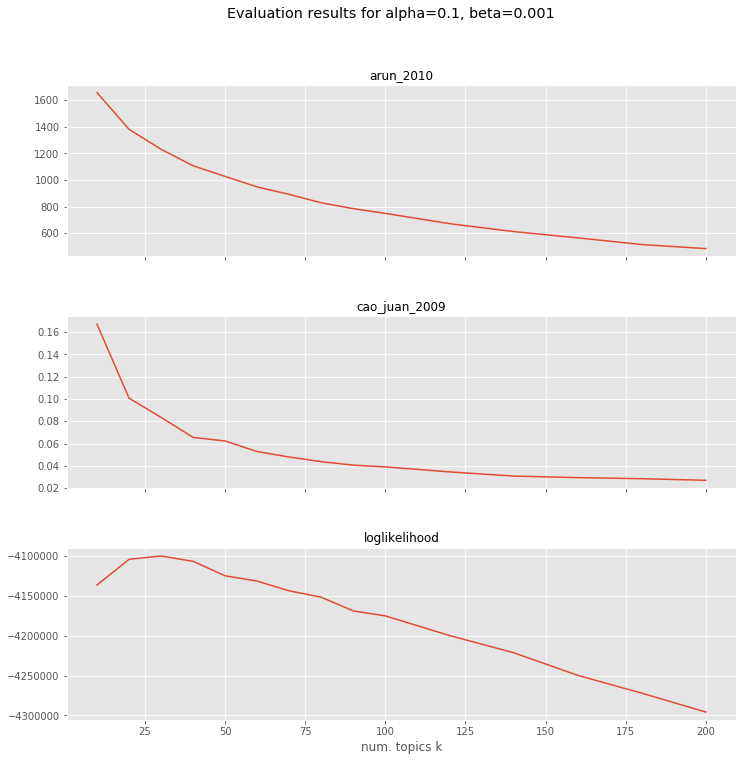

In [47]:
print('plotting evaluation results')
results_by_n_topics = results_by_parameter(eval_results4, 'n_topics')
plot_eval_results(results_by_n_topics, xaxislabel='num. topics k',
                  title='Evaluation results for alpha=0.1, beta=0.001', figsize=(12, 12))
#plt.savefig('data/lda_evaluation_plot.png')
plt.show()

In [48]:
caoTopics=caoScore=arunTopics=arunScore=999999
logScore=-99999999
for res in results_by_n_topics:
    if res[1]['cao_juan_2009'] < caoScore:
        caoScore = res[1]['cao_juan_2009']
        caoTopics = res[0]
    if res[1]['arun_2010'] < arunScore:
        arunScore = res[1]['arun_2010']
        arunTopics = res[0]
    if res[1]['loglikelihood'] > logScore:
        logScore = res[1]['loglikelihood']
        logTopics = res[0]       
print("cao : %s \t %s" % (caoScore, caoTopics))        
print("arun: %s \t %s" % (arunScore, arunTopics))
print("log: %s \t %s" % (logScore, logTopics))

cao : 0.02710069315649491 	 200
arun: 484.73896182094813 	 200
log: -4100241.0383522254 	 30


### alpha: 1/k beta: 1/(10*k)

In [40]:
const_params = dict(n_iter=2000)
ks = list(range(10, 100, 10)) + list(range(100, 210, 20))
varying_params = [dict(n_topics=k, alpha=1.0/k, eta=1.0/(10*k)) for k in ks]

eval_results5 = tm_lda.evaluate_topic_models(dtm,
    varying_params,
    const_params)

INFO:lda:n_documents: 113146
INFO:lda:n_documents: 113146
INFO:lda:n_documents: 113146
INFO:lda:n_documents: 113146
INFO:lda:vocab_size: 21112
INFO:lda:vocab_size: 21112
INFO:lda:vocab_size: 21112
INFO:lda:vocab_size: 21112
INFO:lda:n_documents: 113146
INFO:lda:n_words: 580410
INFO:lda:n_words: 580410
INFO:lda:n_topics: 30
INFO:lda:n_topics: 70
INFO:lda:n_iter: 2000
INFO:lda:n_words: 580410
INFO:lda:n_iter: 2000
INFO:lda:n_topics: 20
INFO:lda:n_documents: 113146
INFO:lda:n_iter: 2000
INFO:lda:n_documents: 113146
INFO:lda:n_documents: 113146
INFO:lda:vocab_size: 21112
INFO:lda:n_words: 580410
INFO:lda:n_topics: 50
INFO:lda:vocab_size: 21112
INFO:lda:n_words: 580410
INFO:lda:vocab_size: 21112
INFO:lda:n_iter: 2000
INFO:lda:n_topics: 40
INFO:lda:n_documents: 113146
INFO:lda:n_documents: 113146
INFO:lda:n_words: 580410
INFO:lda:n_iter: 2000
INFO:lda:vocab_size: 21112
INFO:lda:vocab_size: 21112
INFO:lda:vocab_size: 21112
INFO:lda:n_documents: 113146
INFO:lda:n_words: 580410
INFO:lda:n_words

INFO:lda:<60> log likelihood: -4148416
INFO:lda:<20> log likelihood: -4355400
INFO:lda:<20> log likelihood: -4355843
INFO:lda:<70> log likelihood: -4140022
INFO:lda:<10> log likelihood: -4789291
INFO:lda:<50> log likelihood: -4141764
INFO:lda:<80> log likelihood: -4134697
INFO:lda:<30> log likelihood: -4211802
INFO:lda:<10> log likelihood: -4783696
INFO:lda:<90> log likelihood: -4127458
INFO:lda:<20> log likelihood: -4365021
INFO:lda:<10> log likelihood: -4793478
INFO:lda:<30> log likelihood: -4207639
INFO:lda:<60> log likelihood: -4123316
INFO:lda:<100> log likelihood: -4123086
INFO:lda:<20> log likelihood: -4384261
INFO:lda:<40> log likelihood: -4150515
INFO:lda:<10> log likelihood: -4804187
INFO:lda:<110> log likelihood: -4119479
INFO:lda:<70> log likelihood: -4111967
INFO:lda:<30> log likelihood: -4200956
INFO:lda:<120> log likelihood: -4118160
INFO:lda:<80> log likelihood: -4105403
INFO:lda:<130> log likelihood: -4113947
INFO:lda:<40> log likelihood: -4137940
INFO:lda:<50> log lik

INFO:lda:<90> log likelihood: -3997921
INFO:lda:<250> log likelihood: -4024763
INFO:lda:<110> log likelihood: -3984143
INFO:lda:<60> log likelihood: -4050788
INFO:lda:<380> log likelihood: -4052381
INFO:lda:<660> log likelihood: -4090400
INFO:lda:<50> log likelihood: -4097465
INFO:lda:<190> log likelihood: -3994262
INFO:lda:<670> log likelihood: -4090807
INFO:lda:<390> log likelihood: -4051246
INFO:lda:<260> log likelihood: -4023689
INFO:lda:<130> log likelihood: -3974527
INFO:lda:<680> log likelihood: -4090208
INFO:lda:<690> log likelihood: -4090277
INFO:lda:<160> log likelihood: -3975305
INFO:lda:<40> log likelihood: -4160666
INFO:lda:<400> log likelihood: -4048942
INFO:lda:<700> log likelihood: -4090589
INFO:lda:<200> log likelihood: -3991607
INFO:lda:<270> log likelihood: -4022435
INFO:lda:<710> log likelihood: -4090728
INFO:lda:<410> log likelihood: -4049841
INFO:lda:<120> log likelihood: -3977917
INFO:lda:<720> log likelihood: -4090399
INFO:lda:<100> log likelihood: -3985591
INFO

INFO:lda:<700> log likelihood: -4044601
INFO:lda:<1230> log likelihood: -4087261
INFO:lda:<470> log likelihood: -4005509
INFO:lda:<1240> log likelihood: -4087033
INFO:lda:<710> log likelihood: -4043636
INFO:lda:<170> log likelihood: -3940501
INFO:lda:<1250> log likelihood: -4086991
INFO:lda:<360> log likelihood: -3969062
INFO:lda:<720> log likelihood: -4044750
INFO:lda:<480> log likelihood: -4005274
INFO:lda:<1260> log likelihood: -4086867
INFO:lda:<290> log likelihood: -3949064
INFO:lda:<240> log likelihood: -3942243
INFO:lda:<1270> log likelihood: -4085736
INFO:lda:<730> log likelihood: -4043297
INFO:lda:<210> log likelihood: -3941403
INFO:lda:<140> log likelihood: -3928968
INFO:lda:<1280> log likelihood: -4086142
INFO:lda:<490> log likelihood: -4006047
INFO:lda:<370> log likelihood: -3968624
INFO:lda:<740> log likelihood: -4043159
INFO:lda:<1290> log likelihood: -4086658
INFO:lda:<160> log likelihood: -3923711
INFO:lda:<1300> log likelihood: -4085972
INFO:lda:<300> log likelihood: -

INFO:lda:<1030> log likelihood: -4039189
INFO:lda:<1800> log likelihood: -4084408
INFO:lda:<200> log likelihood: -3902605
INFO:lda:<1810> log likelihood: -4084210
INFO:lda:<420> log likelihood: -3935651
INFO:lda:<1040> log likelihood: -4038508
INFO:lda:<700> log likelihood: -3997466
INFO:lda:<1820> log likelihood: -4084519
INFO:lda:<140> log likelihood: -3916006
INFO:lda:<300> log likelihood: -3924765
INFO:lda:<530> log likelihood: -3958382
INFO:lda:<1830> log likelihood: -4083520
INFO:lda:<1050> log likelihood: -4038519
INFO:lda:<230> log likelihood: -3900644
INFO:lda:<1840> log likelihood: -4084619
INFO:lda:<350> log likelihood: -3927092
INFO:lda:<710> log likelihood: -3998337
INFO:lda:<1850> log likelihood: -4085040
INFO:lda:<1060> log likelihood: -4038038
INFO:lda:<170> log likelihood: -3898693
INFO:lda:<430> log likelihood: -3934490
INFO:lda:<1860> log likelihood: -4083955
INFO:lda:<540> log likelihood: -3957773
INFO:lda:<260> log likelihood: -3916673
INFO:lda:<1070> log likelihoo

INFO:lda:<230> log likelihood: -3875510
INFO:lda:<350> log likelihood: -3900405
INFO:lda:<410> log likelihood: -3912802
INFO:lda:<1440> log likelihood: -4033705
INFO:lda:<580> log likelihood: -3927536
INFO:lda:<280> log likelihood: -3882354
INFO:lda:<730> log likelihood: -3952100
INFO:lda:<970> log likelihood: -3992190
INFO:lda:<1450> log likelihood: -4034213
INFO:lda:<480> log likelihood: -3916570
INFO:lda:<170> log likelihood: -3878790
INFO:lda:<130> log likelihood: -3906453
INFO:lda:<1460> log likelihood: -4035075
INFO:lda:<980> log likelihood: -3991981
INFO:lda:<590> log likelihood: -3927130
INFO:lda:<740> log likelihood: -3953371
INFO:lda:<150> log likelihood: -3892322
INFO:lda:<1470> log likelihood: -4035206
INFO:lda:<320> log likelihood: -3884320
INFO:lda:<420> log likelihood: -3910876
INFO:lda:<360> log likelihood: -3896887
INFO:lda:<990> log likelihood: -3992298
INFO:lda:<1480> log likelihood: -4034977
INFO:lda:<490> log likelihood: -3914790
INFO:lda:<750> log likelihood: -395

INFO:lda:<950> log likelihood: -3947538
INFO:lda:<1890> log likelihood: -4033040
INFO:lda:<1270> log likelihood: -3987493
INFO:lda:<770> log likelihood: -3919948
INFO:lda:<1900> log likelihood: -4033755
INFO:lda:<540> log likelihood: -3901925
INFO:lda:<170> log likelihood: -3869749
INFO:lda:<630> log likelihood: -3906550
INFO:lda:<1280> log likelihood: -3988738
INFO:lda:<960> log likelihood: -3947266
INFO:lda:<1910> log likelihood: -4033474
INFO:lda:<370> log likelihood: -3867068
INFO:lda:<1290> log likelihood: -3987493
INFO:lda:<1920> log likelihood: -4032981
INFO:lda:<780> log likelihood: -3919839
INFO:lda:<470> log likelihood: -3887907
INFO:lda:<970> log likelihood: -3948143
INFO:lda:<310> log likelihood: -3857863
INFO:lda:<1930> log likelihood: -4032583
INFO:lda:<260> log likelihood: -3862745
INFO:lda:<420> log likelihood: -3872826
INFO:lda:<640> log likelihood: -3905585
INFO:lda:<550> log likelihood: -3903237
INFO:lda:<1300> log likelihood: -3988022
INFO:lda:<1940> log likelihood:

INFO:lda:<470> log likelihood: -3858094
INFO:lda:<1640> log likelihood: -3985550
INFO:lda:<530> log likelihood: -3863895
INFO:lda:<390> log likelihood: -3845399
INFO:lda:<810> log likelihood: -3899681
INFO:lda:<1230> log likelihood: -3945323
INFO:lda:<990> log likelihood: -3915840
INFO:lda:<250> log likelihood: -3839530
INFO:lda:<1650> log likelihood: -3985582
INFO:lda:<600> log likelihood: -3878651
INFO:lda:<330> log likelihood: -3848594
INFO:lda:<1240> log likelihood: -3943824
INFO:lda:<220> log likelihood: -3844613
INFO:lda:<700> log likelihood: -3893993
INFO:lda:<1000> log likelihood: -3915206
INFO:lda:<1660> log likelihood: -3985366
INFO:lda:<820> log likelihood: -3898210
INFO:lda:<290> log likelihood: -3827805
INFO:lda:<1670> log likelihood: -3985311
INFO:lda:<1250> log likelihood: -3944421
INFO:lda:<540> log likelihood: -3863814
INFO:lda:<480> log likelihood: -3856554
INFO:lda:<1010> log likelihood: -3915512
INFO:lda:<610> log likelihood: -3877541
INFO:lda:<1680> log likelihood:

INFO:lda:<580> log likelihood: -3849047
INFO:lda:<480> log likelihood: -3835355
INFO:lda:<1000> log likelihood: -3894195
INFO:lda:<1220> log likelihood: -3911261
INFO:lda:<1520> log likelihood: -3941167
INFO:lda:<740> log likelihood: -3872947
INFO:lda:<270> log likelihood: -3827733
INFO:lda:<860> log likelihood: -3889164
INFO:lda:<1530> log likelihood: -3940646
INFO:lda:<310> log likelihood: -3820615
INFO:lda:<1230> log likelihood: -3911753
INFO:lda:<660> log likelihood: -3857403
INFO:lda:<1010> log likelihood: -3892761
INFO:lda:<590> log likelihood: -3848511
INFO:lda:<1540> log likelihood: -3943289
INFO:lda:<410> log likelihood: -3834194
INFO:lda:<1240> log likelihood: -3912820
INFO:lda:<750> log likelihood: -3872946
INFO:lda:<870> log likelihood: -3889081
INFO:lda:<490> log likelihood: -3835236
INFO:lda:<1020> log likelihood: -3892564
INFO:lda:<1550> log likelihood: -3939793
INFO:lda:<360> log likelihood: -3814863
INFO:lda:<670> log likelihood: -3856875
INFO:lda:<1250> log likelihood

INFO:lda:<1060> log likelihood: -3884566
INFO:lda:<810> log likelihood: -3850948
INFO:lda:<1240> log likelihood: -3887680
INFO:lda:<1510> log likelihood: -3908945
INFO:lda:<1890> log likelihood: -3938949
INFO:lda:<600> log likelihood: -3825701
INFO:lda:<920> log likelihood: -3864326
INFO:lda:<1520> log likelihood: -3908725
INFO:lda:<1250> log likelihood: -3886143
INFO:lda:<1900> log likelihood: -3939229
INFO:lda:<1070> log likelihood: -3884585
INFO:lda:<440> log likelihood: -3803263
INFO:lda:<730> log likelihood: -3840157
INFO:lda:<820> log likelihood: -3850438
INFO:lda:<1910> log likelihood: -3939115
INFO:lda:<1530> log likelihood: -3908533
INFO:lda:<510> log likelihood: -3822811
INFO:lda:<1260> log likelihood: -3886737
INFO:lda:<930> log likelihood: -3865412
INFO:lda:<340> log likelihood: -3809501
INFO:lda:<1080> log likelihood: -3883975
INFO:lda:<1920> log likelihood: -3937356
INFO:lda:<1540> log likelihood: -3909336
INFO:lda:<390> log likelihood: -3805017
INFO:lda:<610> log likelih

INFO:lda:<1290> log likelihood: -3881523
INFO:lda:<880> log likelihood: -3834542
INFO:lda:<1510> log likelihood: -3884122
INFO:lda:<990> log likelihood: -3845486
INFO:lda:<1840> log likelihood: -3907432
INFO:lda:<730> log likelihood: -3820380
INFO:lda:<410> log likelihood: -3794686
INFO:lda:<1120> log likelihood: -3858349
INFO:lda:<1300> log likelihood: -3879716
INFO:lda:<470> log likelihood: -3794096
INFO:lda:<1850> log likelihood: -3907214
INFO:lda:<1520> log likelihood: -3883326
INFO:lda:<890> log likelihood: -3835297
INFO:lda:<1000> log likelihood: -3846172
INFO:lda:<1860> log likelihood: -3907450
INFO:lda:<620> log likelihood: -3812083
INFO:lda:<1310> log likelihood: -3881438
INFO:lda:<1130> log likelihood: -3858533
INFO:lda:<1530> log likelihood: -3883845
INFO:lda:<540> log likelihood: -3792629
INFO:lda:<740> log likelihood: -3818620
INFO:lda:<1870> log likelihood: -3908529
INFO:lda:<1540> log likelihood: -3883937
INFO:lda:<1320> log likelihood: -3880181
INFO:lda:<900> log likeli

INFO:lda:<1820> log likelihood: -3880791
INFO:lda:<880> log likelihood: -3811931
INFO:lda:<1350> log likelihood: -3853741
INFO:lda:<1070> log likelihood: -3829315
INFO:lda:<1200> log likelihood: -3840511
INFO:lda:<1830> log likelihood: -3880531
INFO:lda:<1570> log likelihood: -3876294
INFO:lda:<570> log likelihood: -3784110
INFO:lda:<1360> log likelihood: -3854388
INFO:lda:<500> log likelihood: -3783391
INFO:lda:<1840> log likelihood: -3881123
INFO:lda:<650> log likelihood: -3786587
INFO:lda:<1210> log likelihood: -3839261
INFO:lda:<1580> log likelihood: -3873635
INFO:lda:<1080> log likelihood: -3829197
INFO:lda:<750> log likelihood: -3804294
INFO:lda:<890> log likelihood: -3813286
INFO:lda:<1850> log likelihood: -3880749
INFO:lda:<1370> log likelihood: -3852602
INFO:lda:<1590> log likelihood: -3876092
INFO:lda:<1220> log likelihood: -3839751
INFO:lda:<1860> log likelihood: -3880781
INFO:lda:<1090> log likelihood: -3828565
INFO:lda:<900> log likelihood: -3812796
INFO:lda:<1600> log lik

INFO:lda:<600> log likelihood: -3773966
INFO:lda:<1630> log likelihood: -3848558
INFO:lda:<780> log likelihood: -3777943
INFO:lda:<1890> log likelihood: -3872374
INFO:lda:<1450> log likelihood: -3835663
INFO:lda:<900> log likelihood: -3795622
INFO:lda:<690> log likelihood: -3775686
INFO:lda:<1070> log likelihood: -3807226
INFO:lda:<1640> log likelihood: -3848415
INFO:lda:<1300> log likelihood: -3824446
INFO:lda:<1900> log likelihood: -3873091
INFO:lda:<1460> log likelihood: -3835630
INFO:lda:<1910> log likelihood: -3872645
INFO:lda:<1650> log likelihood: -3848293
INFO:lda:<910> log likelihood: -3797576
INFO:lda:<790> log likelihood: -3779652
INFO:lda:<1080> log likelihood: -3807872
INFO:lda:<1310> log likelihood: -3823897
INFO:lda:<610> log likelihood: -3772776
INFO:lda:<1470> log likelihood: -3835410
INFO:lda:<1920> log likelihood: -3872587
INFO:lda:<1660> log likelihood: -3847753
INFO:lda:<700> log likelihood: -3776019
INFO:lda:<1320> log likelihood: -3824022
INFO:lda:<1480> log like

INFO:lda:<1570> log likelihood: -3819098
INFO:lda:<1760> log likelihood: -3831012
INFO:lda:<840> log likelihood: -3769646
INFO:lda:<1300> log likelihood: -3802741
INFO:lda:<1100> log likelihood: -3789963
INFO:lda:<1990> log likelihood: -3845097
INFO:lda:<1770> log likelihood: -3832386
INFO:lda:<1580> log likelihood: -3818953
INFO:lda:<740> log likelihood: -3762645
INFO:lda:<960> log likelihood: -3770903
INFO:lda:<1999> log likelihood: -3844882
INFO:tmtoolkit:> evaluation result with metric "loglikelihood": -3845097.049020
INFO:tmtoolkit:> evaluation result with metric "cao_juan_2009": 0.091336
INFO:tmtoolkit:> evaluation result with metric "arun_2010": 927.160496
INFO:lda:<1310> log likelihood: -3801278
INFO:lda:<1110> log likelihood: -3789470
INFO:lda:<1780> log likelihood: -3831457
INFO:lda:<850> log likelihood: -3767895
INFO:lda:<1590> log likelihood: -3819136
INFO:lda:<1790> log likelihood: -3830619
INFO:lda:<1320> log likelihood: -3802772
INFO:lda:<970> log likelihood: -3769434
IN

INFO:lda:<1190> log likelihood: -3764297
INFO:lda:<1620> log likelihood: -3799940
INFO:lda:<1960> log likelihood: -3812908
INFO:lda:<1380> log likelihood: -3782925
INFO:lda:<1060> log likelihood: -3760473
INFO:lda:<930> log likelihood: -3753216
INFO:lda:<1200> log likelihood: -3763984
INFO:lda:<1630> log likelihood: -3797583
INFO:lda:<1970> log likelihood: -3813856
INFO:lda:<1390> log likelihood: -3781870
INFO:lda:<1980> log likelihood: -3812035
INFO:lda:<1640> log likelihood: -3799412
INFO:lda:<1210> log likelihood: -3761681
INFO:lda:<1070> log likelihood: -3759653
INFO:lda:<940> log likelihood: -3753437
INFO:lda:<1990> log likelihood: -3812654
INFO:lda:<1400> log likelihood: -3781304
INFO:lda:<1650> log likelihood: -3798943
INFO:lda:<1220> log likelihood: -3761533
INFO:lda:<1999> log likelihood: -3813417
INFO:tmtoolkit:> evaluation result with metric "loglikelihood": -3812654.275575
INFO:tmtoolkit:> evaluation result with metric "cao_juan_2009": 0.084686
INFO:tmtoolkit:> evaluation r

INFO:lda:<1810> log likelihood: -3776426
INFO:lda:<1230> log likelihood: -3740961
INFO:lda:<1580> log likelihood: -3753824
INFO:lda:<1400> log likelihood: -3748585
INFO:lda:<1820> log likelihood: -3777082
INFO:lda:<1590> log likelihood: -3754788
INFO:lda:<1830> log likelihood: -3777133
INFO:lda:<1240> log likelihood: -3741785
INFO:lda:<1410> log likelihood: -3748606
INFO:lda:<1840> log likelihood: -3776646
INFO:lda:<1600> log likelihood: -3754381
INFO:lda:<1420> log likelihood: -3747669
INFO:lda:<1250> log likelihood: -3740185
INFO:lda:<1850> log likelihood: -3776170
INFO:lda:<1610> log likelihood: -3753988
INFO:lda:<1430> log likelihood: -3748580
INFO:lda:<1260> log likelihood: -3739883
INFO:lda:<1860> log likelihood: -3777914
INFO:lda:<1620> log likelihood: -3754511
INFO:lda:<1440> log likelihood: -3748659
INFO:lda:<1870> log likelihood: -3775017
INFO:lda:<1270> log likelihood: -3739727
INFO:lda:<1630> log likelihood: -3755390
INFO:lda:<1880> log likelihood: -3776399
INFO:lda:<1450> 

INFO:lda:<1830> log likelihood: -3725759
INFO:lda:<1840> log likelihood: -3726533
INFO:lda:<1850> log likelihood: -3727337
INFO:lda:<1860> log likelihood: -3727129
INFO:lda:<1870> log likelihood: -3725148
INFO:lda:<1880> log likelihood: -3727437
INFO:lda:<1890> log likelihood: -3726603
INFO:lda:<1900> log likelihood: -3725911
INFO:lda:<1910> log likelihood: -3725192
INFO:lda:<1920> log likelihood: -3724436
INFO:lda:<1930> log likelihood: -3724850
INFO:lda:<1940> log likelihood: -3724067
INFO:lda:<1950> log likelihood: -3723056
INFO:lda:<1960> log likelihood: -3724394
INFO:lda:<1970> log likelihood: -3724025
INFO:lda:<1980> log likelihood: -3723257
INFO:lda:<1990> log likelihood: -3723687
INFO:lda:<1999> log likelihood: -3723227
INFO:tmtoolkit:> evaluation result with metric "loglikelihood": -3723687.290981
INFO:tmtoolkit:> evaluation result with metric "cao_juan_2009": 0.063629
INFO:tmtoolkit:> evaluation result with metric "arun_2010": 611.780809


plotting evaluation results


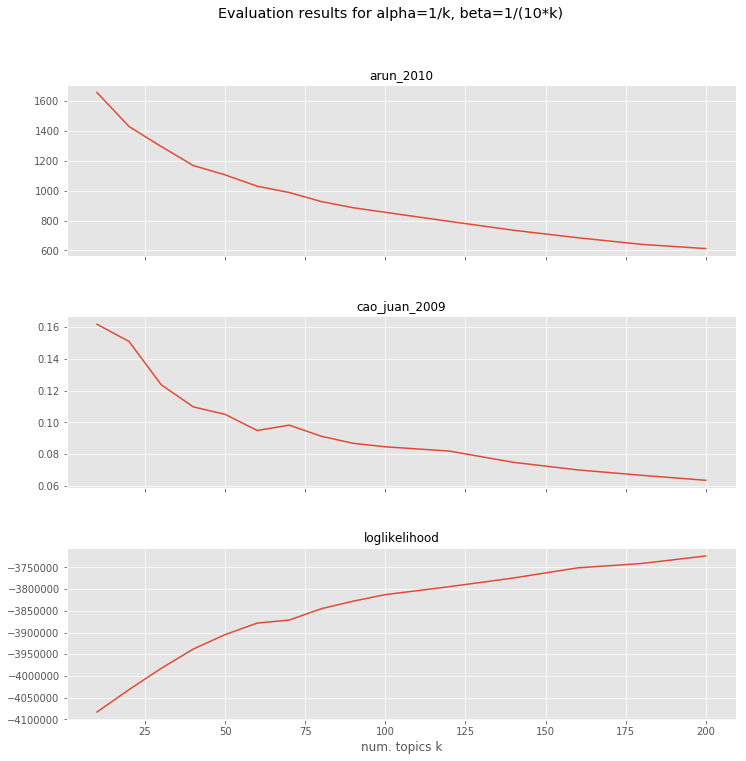

In [41]:
print('plotting evaluation results')
results_by_n_topics = results_by_parameter(eval_results5, 'n_topics')
plot_eval_results(results_by_n_topics, xaxislabel='num. topics k',
                  title='Evaluation results for alpha=1/k, beta=1/(10*k)', figsize=(12, 12))
#plt.savefig('data/lda_evaluation_plot.png')
plt.show()

## Runing LDA
### topics: 30 / alpha: 0.1 / beta: 0.001

In [49]:
#const_params = dict(n_iter=2000, alpha=0.1, eta=0.001)
#varying_params = [dict(n_topics=k) for k in ks]

# Creating the object for LDA model using gensim library
Lda = gensim.models.ldamodel.LdaModel

# Running and Trainign LDA model on the document term matrix.
ldamodel =  models.LdaMulticore(doc_term_matrix, num_topics=30, 
                                id2word = dictionary, passes=50, workers=16, 
                                alpha=0.1, eta=0.001)

/usr/local/lib/python3.5/dist-packages/gensim/models/ldamodel.py:802: RuntimeWarning: divide by zero encountered in log
  diff = np.log(self.expElogbeta)


In [50]:
a =(ldamodel.print_topics(num_topics=60, num_words=5))
for x in a:
    print(x)

(0, '0.149*"call" + 0.103*"today" + 0.081*"learn" + 0.063*"give" + 0.053*"smile"')
(1, '0.315*"dentist" + 0.113*"cosmetic" + 0.055*"dentistry" + 0.046*"houston" + 0.040*"north"')
(2, '0.325*"teeth" + 0.202*"missing" + 0.102*"replace" + 0.018*"solutions" + 0.016*"help"')
(3, '0.253*"tooth" + 0.076*"replacement" + 0.062*"missing" + 0.053*"bridge" + 0.036*"lost"')
(4, '0.096*"life" + 0.074*"long" + 0.053*"back" + 0.048*"last" + 0.039*"smiles"')
(5, '0.200*"blog" + 0.165*"read" + 0.039*"texas" + 0.039*"alternative" + 0.035*"solution"')
(6, '0.133*"procedure" + 0.063*"patient" + 0.028*"standard" + 0.025*"house" + 0.019*"pain"')
(7, '0.061*"beach" + 0.042*"solutions" + 0.035*"experience" + 0.034*"years" + 0.031*"abroad"')
(8, '0.115*"center" + 0.089*"francisco" + 0.084*"announces" + 0.054*"post" + 0.047*"surgeon"')
(9, '0.113*"free" + 0.060*"consultation" + 0.038*"mexico" + 0.034*"book" + 0.033*"price"')
(10, '0.291*"treatment" + 0.046*"hills" + 0.045*"technology" + 0.032*"beverly" + 0.025*"

In [51]:
#print(len(doc_term_matrix))
#print(len(tweets))

#print(doc_term_matrix[1])
#print(tweets[1])

for topico in range(0, 30):
    print("topico: %s" % topico)
    print(a[(topico)])
    print()
    tp = 0
    for i in range(0, len(tweets)):
    #for i in range(0, 1000):    
        topics = ldamodel.get_document_topics(doc_term_matrix[i])
        #rint("%s\n%s\n\n" % (tweets[i] ,topics))
        probTp = 0
        for t in topics:
            if t[1] > probTp:
                probTp = t[1]
                tpTweet = t[0]

        if tpTweet == topico:
            #print("%s\n%s\n\n" % (tweets[i] ,topics))
            print("%s\n\n" % (tweets[i]))
            tp = tp + 1
        if tp > 10:
            break
    print("\n\n-----------\n\n")


topico: 0
(0, '0.149*"call" + 0.103*"today" + 0.081*"learn" + 0.063*"give" + 0.053*"smile"')

https://t.co/k8MUaxxqFs: CT SCAN AID DENTAL IMPLANT... https://t.co/YCUdRRUuSG


https://t.co/P5nbOLZUVp

DENTAL IMPLANTS


Do  you want to know more about Dental Implants? Have a look at our website for more information or give us a... https://t.co/4k2CD4Gf0Z


Regain your smile with dental implants for only £1950! Call the 543 team for more information on 01482 565488 https://t.co/lmAIqiLD8z


DENTAL IMPLANT https://t.co/NU3i8Zxw42


RT @docazouz: Contact us for more information about dental implants! https://t.co/LAdPcB7Ueb


RT @docazouz: Contact us for more information about dental implants! https://t.co/LAdPcB7Ueb


Dental Implants https://t.co/q9QKqbYgUX #dentist


https://t.co/k8MUaxxqFs: Dental Implant, Sinus... https://t.co/YowfevHghK


DENTAL IMPLANTS NASHVILLE and MURFREESBORO by Hardison, Mark F Author 2013 Hardcover  #Doctorbookpublishingcom2013 https://t.co/plCUjCj0p8


Consider

In today’s blog, we learn about the interesting history of the dental implant. Read on to find out more! https://t.co/jmnlmRvIh9


@Osstell So to all clinicians who are providing dental implants ... how do you judge implant stability? Do you ISQ?? https://t.co/6xf5WnEVy4




-----------


topico: 6
(6, '0.133*"procedure" + 0.063*"patient" + 0.028*"standard" + 0.025*"house" + 0.019*"pain"')

DENTAL IMPLANTS?
In United Dental Specialist, we have Specialists to perform this procedure.
The main benefit is th… https://t.co/HvyHaT7DhK


BUSINESS DEALS : https://t.co/4BcW6ljuoC #910 Dental Implant Disease Teeth Model Restoration &amp; Bridge Tooth Ideal … https://t.co/so1g1Sd9tb


USA BUSINESS DEALS : https://t.co/WYwWAi7DaC #9192 Dental Implant Disease Teeth Model Restoration &amp; Bridge Tooth I… https://t.co/8u8h0QhUCg


#USA Hot DEALS &gt;&gt; https://t.co/uaPrvtUrg5 #6632 Dental Implant Disease Teeth Model Restoration &amp; Bridge Tooth Idea… https://t.co/2HVvVpJkJ6


Hot Business Deals 

While dental implants are a safe way to restore your smile, the procedure is surgical, and may lead to... https://t.co/osf3HL7NKI


Why Choose Dental Implants in South Austin, TX Over Other Options? - https://t.co/4ltoORp0d3


Why Choose Dental Implants in South Austin, TX Over Other Options? - https://t.co/sSJPIMexkH


Why Choose Dental Implants in South Austin, TX Over Other Options? - https://t.co/JtZ6dfDPH8




-----------


topico: 12
(12, '0.102*"information" + 0.065*"time" + 0.055*"perfect" + 0.048*"area" + 0.038*"page"')

Experienced dentists at Selly Oak and Kings Heath for your #Dental Implants. Book your #free consultation today: https://t.co/HXTO8PApKL


RT @MidlandsSmile: Experienced dentists at Selly Oak and Kings Heath for your #Dental Implants. Book your #free consultation today: https:/…


ReadersGazette: RT MidlandsSmile: Experienced dentists at Selly Oak and Kings Heath for your #Dental Implants. Boo… https://t.co/LkfsnOslnX


ReadersGazette: RT MidlandsSmile: Experi

Best Quality Dental Implants In Las Vegas https://t.co/2yDbqH0gqs #allon4implants


Best Quality Dental Implants Las Vegas https://t.co/KwUcGB1V58 #lasvegas


#Dental implants broken screw retrieval method kit easy to rescue https://t.co/JKARdi1HVL https://t.co/T0YaeINbL3


Throw Back Thursday

Archaeologists discover 2,300-year-old dental implant in Iron Age burial chamber https://t.co/WuJsIIKdrl


I just added "Dental Implants Dentist Philadelphia PA" to Drew A. Shulman DMD, MAGD on @Vimeo: https://t.co/xfVX1pm7Te


Promo: Just what are Dental Implants? - https://t.co/uh3rmkKz6q




-----------


topico: 18
(18, '0.077*"looking" + 0.056*"make" + 0.049*"want" + 0.040*"toronto" + 0.038*"questions"')

Immediate dental implant - Can you really do that? is a new blog on our website. It explains the procedure in... https://t.co/aD8ZWwryEc


These dental implants in Plainfield IL will make you smile radiant and wide! https://t.co/cTkRScslU1


Dental Implants Overview https://t.co/q9QKqbYgUX

From the blog:  Who is a Candidate for All-on-Four Dental Implants? https://t.co/ANUJJVJSTR


A full range of dental treatments as well as the #Dental Implant centre https://t.co/5Q5hG8w34t #dentist #Stirling https://t.co/pryq5b9QgH


RT @DollarDental: A full range of dental treatments as well as the #Dental Implant centre https://t.co/5Q5hG8w34t #dentist #Stirling https:…


#Dental implants##Queries Revealed https://t.co/zazUfLICeE


Watch "Have Your Smile Back at Best Dental Implant Clinic in Croatia"  https://t.co/PGjub8lWfN #dental #dentalimplants #Croatia #vacation


Tired of denture pain? Schedule a consultation to see if you are a candidate for dental implants! 972-231-0585 https://t.co/KJKikBAdUu


Stop Denture Discomfort with Dental Implants https://t.co/SSPgYz8Io4


Dental Implants Clinic in Croatia by @PlacidWay #best #cosmeticdentistrycourses https://t.co/CpEmvp1d1j via @SlideShare


Am I a Good Candidate for Dental Implants? - Are you ready to discover if these tooth resto

In [52]:
cmd = ("SELECT t.codtweet, t.text "
       "FROM tweet t "
       "INNER JOIN resultadoanaliseprojetotweet r ON r.codtweet = t.codtweet "
       "WHERE codresultadoanaliseprojeto = 12 AND codclassificacao = 223"
       )
tweets2 = query(cmd)
print(len(tweets2))

17227


In [53]:
tweets2[:10]

[(77432412,
  "Don't forget to register for the next Dental Implant Seminar. July 13 in East Aurora; July 14 in Amherst.... https://t.co/4N4qeo9ygw"),
 (77490497,
  'Register Now!\n\nDental Implant Training (2 modules) With patients 1st Module (2-3 days) 13-15 October 2016\n\nModule... https://t.co/TbHaJSrXIl'),
 (77493277,
  'Register Now!\n\nDental Implant Training (2 modules) With patients 1st Module (2-3 days) 13-15 October 2016\n\nModule... https://t.co/gkH0Q2Uc2V'),
 (77494286,
  'Dental Consumables Market :  Take Advantage of Growing Dental Implant Demand https://t.co/eWR4ajMigv #infowars #alexjones'),
 (77496127,
  'Free Senior Lecture Dental Treatment For A Lifetime Using Dental Implants: Wed, Jul 13 2016 11:30 AM… https://t.co/APBnaj5EIc #GlendaleCA'),
 (77499407,
  'Thinking about Dental Implants? Join us tonight for a FREE Seminar &amp; get all of your questions answered! https://t.co/Y0YDwSesuV'),
 (77499495,
  '[DENTAL PROFESSIONALS] CE: Jul 28 Online Marketing Strategies

In [54]:
tweets[:10]

[('Immediate dental implant - Can you really do that? is a new blog on our website. It explains the procedure in... https://t.co/aD8ZWwryEc',),
 ('RT @TomMeyerDDS: Dental implants - what they are and why you may want to consider this procedure. https://t.co/66WhABA2s5 #DesPlaines #dent…',),
 ('The Versatility Of Dental Implants https://t.co/pXYknPe8M3',),
 ('Dental Implants or Dentures &amp; Partials: Which Is Right for You? https://t.co/iWf6ZjpyWW',),
 ('Dental Implants or Dentures &amp; Partials: Which Is Right for You? https://t.co/iWf6ZjpyWW https://t.co/4vK2HCMuMJ',),
 ('Dental implants are the long term solution to tooth loss – for one tooth or all teeth! #Tonbridge',),
 ('Dental Implants - Considering a dental implant? Things you should know! - Dr. Gary Coatroom\nhttps://t.co/GtZ0302yn3',),
 ('RT @NigelImplants: Dental implants can help to boost your confidence. Find out more here: https://t.co/l1RiKajfPn #dentalhour https://t.co/…',),
 ('Dental implants are just like your natur

In [55]:
twTopics = []
for i in range(0, len(tweets2)):
    topics = ldamodel.get_document_topics(doc_term_matrix[i])
    #print("%s\n%s\n\n" % (tweets2[i] ,topics))
    probTp = 0
    for t in topics:
        if t[1] > probTp:
            probTp = t[1]
            tpTweet = t[0]
    #print(tpTweet)
    twTopics.append(tpTweet + 1)

    cmd = ("INSERT INTO resultadoanaliseprojetotweet "
           "(codresultadoanaliseprojeto, codclassificacao, codtweet) VALUES " 
           "(14, 1" + str(tpTweet + 1).zfill(3) + " , " + str(tweets2[i][0]) + ")");
    execSQL(cmd)
    
Counter(twTopics).most_common()

[(1, 1390),
 (3, 1013),
 (20, 951),
 (6, 922),
 (4, 896),
 (5, 704),
 (13, 677),
 (24, 675),
 (27, 659),
 (9, 633),
 (21, 610),
 (23, 597),
 (30, 587),
 (15, 544),
 (26, 497),
 (10, 485),
 (19, 459),
 (8, 452),
 (11, 451),
 (7, 434),
 (2, 427),
 (17, 425),
 (29, 411),
 (22, 404),
 (25, 374),
 (14, 350),
 (12, 340),
 (28, 337),
 (16, 265),
 (18, 258)]